## <b> Name: Praveen Kumar Rajanbabu </b>
## <b> Batch: September 22nd Batch </b>

## <b> Retail Sales Prediction </b>

### XYZ operates over 3,000 drug stores in 7 countries. XYZ store managers are currently tasked with predicting their daily sales up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school, and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

### You are provided with historical sales data for 1,115 XYZ stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.


### There are 2 Datasets:

## <b> Data Dictionary 1: </b>

### Id - an Id that represents a (Store, Date) duple within the set
### Store - a unique Id for each store
### Sales - the turnover for any given day (Dependent Variable)
### Customers - the number of customers on a given day
### Open - an indicator for whether the store was open: 0 = closed, 1 = open
### State Holiday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
### School Holiday - indicates if the (Store) was affected by the closure of public schools
### Store Type - differentiates between 4 different store models: a, 

## <b> Data Dictionary 2: </b>

### Assortment - describes an assortment level: a = basic, b = extra, c = extended. An assortment strategy in retailing involves the number and type of products that stores display for purchase by consumers.
### Competition Distance – the distance in meters to the nearest competitor store
### Competition Open Since[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
### Promo - indicates whether a store is running a promo on that day
### Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
### Promo2  Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
### Promo Interval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb, May, Aug, Nov"means each round starts in February, May, August, and November of any give store

In [1]:
#Imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Supress the warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read the dataset into python
df_Sales = pd.read_csv('Salesdata.csv')
df_Sales.head()

Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  31-07-2015   5263        555     1      1            0   
1      2          5  31-07-2015   6064        625     1      1            0   
2      3          5  31-07-2015   8314        821     1      1            0   
3      4          5  31-07-2015  13995       1498     1      1            0   
4      5          5  31-07-2015   4822        559     1      1            0   

   SchoolHoliday  
0              1  
1              1  
2              1  
3              1  
4              1

In [3]:
len(df_Sales)

1017209

In [4]:
# Getting the information about the dataset
df_Sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [5]:
# To understand the values counts of each and every feature

for column in df_Sales.columns:
    print(f"Value counts for column '{column}':")
    print(df_Sales[column].value_counts())
    print("\n" + "="*50 + "\n")

Value counts for column 'Store':
Store
1      942
726    942
708    942
709    942
713    942
      ... 
159    758
637    758
636    758
633    758
155    758
Name: count, Length: 1115, dtype: int64


Value counts for column 'DayOfWeek':
DayOfWeek
5    145845
4    145845
3    145665
2    145664
1    144730
7    144730
6    144730
Name: count, dtype: int64


Value counts for column 'Date':
Date
31-07-2015    1115
06-11-2013    1115
18-11-2013    1115
17-11-2013    1115
16-11-2013    1115
              ... 
28-10-2014     935
27-10-2014     935
26-10-2014     935
25-10-2014     935
08-12-2014     935
Name: count, Length: 942, dtype: int64


Value counts for column 'Sales':
Sales
0        172871
5674        215
5558        197
5483        196
6214        195
          ...  
23806         1
24183         1
20651         1
25083         1
23303         1
Name: count, Length: 21734, dtype: int64


Value counts for column 'Customers':
Customers
0       172869
560       2414
576       2363
60

In [6]:
df_Sales.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

In [7]:
# To figure the count of null item in the dataset
df_Sales.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [8]:
df_Sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [9]:
#Summary Statastics
df_Sales.describe()

Store     DayOfWeek         Sales     Customers          Open  \
count  1.017209e+06  1.017209e+06  1.017209e+06  1.017209e+06  1.017209e+06   
mean   5.584297e+02  3.998341e+00  5.773819e+03  6.331459e+02  8.301067e-01   
std    3.219087e+02  1.997391e+00  3.849926e+03  4.644117e+02  3.755392e-01   
min    1.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    2.800000e+02  2.000000e+00  3.727000e+03  4.050000e+02  1.000000e+00   
50%    5.580000e+02  4.000000e+00  5.744000e+03  6.090000e+02  1.000000e+00   
75%    8.380000e+02  6.000000e+00  7.856000e+03  8.370000e+02  1.000000e+00   
max    1.115000e+03  7.000000e+00  4.155100e+04  7.388000e+03  1.000000e+00   

              Promo  SchoolHoliday  
count  1.017209e+06   1.017209e+06  
mean   3.815145e-01   1.786467e-01  
std    4.857586e-01   3.830564e-01  
min    0.000000e+00   0.000000e+00  
25%    0.000000e+00   0.000000e+00  
50%    0.000000e+00   0.000000e+00  
75%    1.000000e+00   0.000000e+00  
max    1.000000e+00   1.000000e+00

In [10]:
# Storing all the DType Integer values into a new DataFrame called "df_Sales_Int
df_Sales_Int = df_Sales[['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo', 'SchoolHoliday']]

In [11]:
df_Sales_Int

Store  DayOfWeek  Sales  Customers  Open  Promo  SchoolHoliday
0            1          5   5263        555     1      1              1
1            2          5   6064        625     1      1              1
2            3          5   8314        821     1      1              1
3            4          5  13995       1498     1      1              1
4            5          5   4822        559     1      1              1
...        ...        ...    ...        ...   ...    ...            ...
1017204   1111          2      0          0     0      0              1
1017205   1112          2      0          0     0      0              1
1017206   1113          2      0          0     0      0              1
1017207   1114          2      0          0     0      0              1
1017208   1115          2      0          0     0      0              1

[1017209 rows x 7 columns]

In [12]:
# Identifying the minimum and maximum values of each columns
min_max_values={}

for column in df_Sales_Int.columns:
    min_value = df_Sales_Int[column].min()
    max_value = df_Sales_Int[column].max()
    min_max_values[column] = {'Min': min_value, 'Max': max_value}

# Printing the results
for column, values in min_max_values.items():
    print(f"Column '{column}': Min = {values['Min']}, Max = {values['Max']}")

Column 'Store': Min = 1, Max = 1115
Column 'DayOfWeek': Min = 1, Max = 7
Column 'Sales': Min = 0, Max = 41551
Column 'Customers': Min = 0, Max = 7388
Column 'Open': Min = 0, Max = 1
Column 'Promo': Min = 0, Max = 1
Column 'SchoolHoliday': Min = 0, Max = 1


In [13]:
df_Sales.Store.nunique()

1115

Exploring Dataset 2

In [14]:
# Read the dataset into python
df_store = pd.read_csv('store.csv')
df_store.head()

Store StoreType Assortment  CompetitionDistance  CompetitionOpenSinceMonth  \
0      1         c          a               1270.0                        9.0   
1      2         a          a                570.0                       11.0   
2      3         a          a              14130.0                       12.0   
3      4         c          c                620.0                        9.0   
4      5         a          a              29910.0                        4.0   

   CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
0                    2008.0       0              NaN              NaN   
1                    2007.0       1             13.0           2010.0   
2                    2006.0       1             14.0           2011.0   
3                    2009.0       0              NaN              NaN   
4                    2015.0       0              NaN              NaN   

     PromoInterval  
0              NaN  
1  Jan,Apr,Jul,Oct  
2  Jan,Apr,Jul,Oct  
3              NaN  
4              NaN

In [15]:
df_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [16]:
df_store.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [17]:
df_store.shape

(1115, 10)

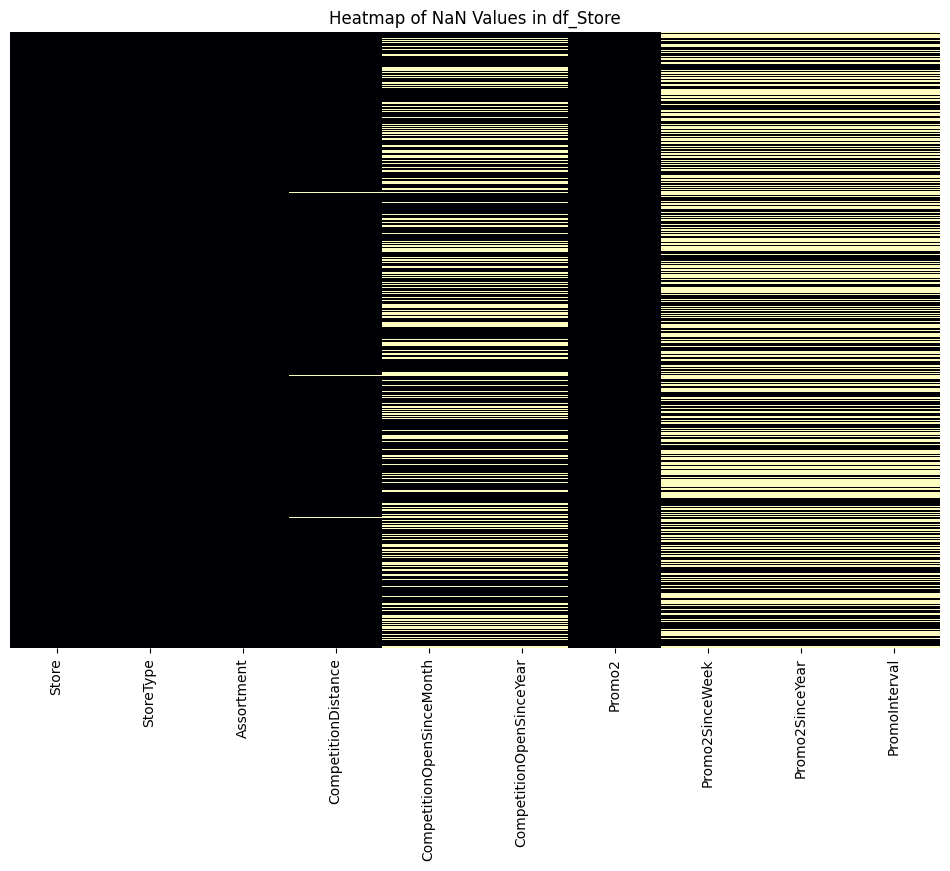

In [18]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_store.isnull(), cbar=False, cmap='magma', yticklabels=False)
plt.title('Heatmap of NaN Values in df_Store')
plt.show()

Calculating the overall % of null values

In [19]:
null_count = df_store['CompetitionOpenSinceMonth'].isnull().sum()

# Get the total number of values in the 'CompetitionOpenSinceMonth' column
total_count = df_store['CompetitionOpenSinceMonth'].shape[0]

# Calculate the percentage of null values
null_percentage = (null_count / total_count) * 100

In [20]:
print(f"Percentage of null values in 'CompetitionOpenSinceMonth': {null_percentage:.2f}%")

Percentage of null values in 'CompetitionOpenSinceMonth': 31.75%


In [21]:
null_count = df_store['CompetitionOpenSinceYear'].isnull().sum()

# Get the total number of values in the 'CompetitionOpenSinceMonth' column
total_count = df_store['CompetitionOpenSinceYear'].shape[0]

# Calculate the percentage of null values
null_percentage = (null_count / total_count) * 100

In [22]:
print(f"Percentage of null values in 'CompetitionOpenSinceYear': {null_percentage:.2f}%")

Percentage of null values in 'CompetitionOpenSinceYear': 31.75%


In [23]:
null_count = df_store['Promo2SinceWeek'].isnull().sum()

# Get the total number of values in the 'CompetitionOpenSinceMonth' column
total_count = df_store['Promo2SinceWeek'].shape[0]

# Calculate the percentage of null values
null_percentage = (null_count / total_count) * 100

In [24]:
print(f"Percentage of null values in 'Promo2SinceWeek': {null_percentage:.2f}%")

Percentage of null values in 'Promo2SinceWeek': 48.79%


In [25]:
null_count = df_store['Promo2SinceYear'].isnull().sum()

# Get the total number of values in the 'CompetitionOpenSinceMonth' column
total_count = df_store['Promo2SinceYear'].shape[0]

# Calculate the percentage of null values
null_percentage = (null_count / total_count) * 100

In [26]:
print(f"Percentage of null values in 'Promo2SinceYear': {null_percentage:.2f}%")

Percentage of null values in 'Promo2SinceYear': 48.79%


In [27]:
null_count = df_store['PromoInterval'].isnull().sum()

# Get the total number of values in the 'CompetitionOpenSinceMonth' column
total_count = df_store['PromoInterval'].shape[0]

# Calculate the percentage of null values
null_percentage = (null_count / total_count) * 100

In [28]:
print(f"Percentage of null values in 'PromoInterval': {null_percentage:.2f}%")

Percentage of null values in 'PromoInterval': 48.79%


In [29]:
null_count = df_store['CompetitionDistance'].isnull().sum()

# Get the total number of values in the 'CompetitionOpenSinceMonth' column
total_count = df_store['CompetitionDistance'].shape[0]

# Calculate the percentage of null values
null_percentage = (null_count / total_count) * 100

In [30]:
print(f"Percentage of null values in 'CompetitionDistance': {null_percentage:.2f}%")

Percentage of null values in 'CompetitionDistance': 0.27%


###### <b>Overall % of Null Values </b>
###### Percentage of null values in 'CompetitionOpenSinceMonth': 31.75%
###### Percentage of null values in 'CompetitionOpenSinceYear': 31.75%
###### Percentage of null values in 'Promo2SinceWeek': 48.79% </b>
###### Percentage of null values in 'Promo2SinceYear': 48.79% </b>
###### Percentage of null values in 'PromoInterval': 48.79%
###### Percentage of null values in 'CompetitionDistance': 0.27%

##### Since the % of the null values are greater than 30%, the data is taken a copy and dropped in the persuit of better model performance

In [31]:
df_store_2=df_store.copy()

In [32]:
df_store_2 = df_store_2.drop(['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear','Promo2SinceWeek',
                     'Promo2SinceYear', 'PromoInterval'], axis=1)

In [33]:
df_store_2

Store StoreType Assortment  CompetitionDistance  Promo2
0         1         c          a               1270.0       0
1         2         a          a                570.0       1
2         3         a          a              14130.0       1
3         4         c          c                620.0       0
4         5         a          a              29910.0       0
...     ...       ...        ...                  ...     ...
1110   1111         a          a               1900.0       1
1111   1112         c          c               1880.0       0
1112   1113         a          c               9260.0       0
1113   1114         a          c                870.0       0
1114   1115         d          c               5350.0       1

[1115 rows x 5 columns]

##### From the value counts performed on df_Sales, the feature related to StateHoliday need to be rechecked again if the leave segments can be merged

In [34]:
df_Sales['StateHoliday'].value_counts()

StateHoliday
0    855087
0    131072
a     20260
b      6690
c      4100
Name: count, dtype: int64

In [35]:
# Since the State Holiday as '0' appears twice on value_counts. To clean the data by stripping white spaces
df_Sales['StateHoliday'] = df_Sales['StateHoliday'].str.strip()

# Now check the value counts again
print(df_Sales['StateHoliday'].value_counts())

StateHoliday
0    855087
a     20260
b      6690
c      4100
Name: count, dtype: int64


In [36]:
value_counts_SH=df_Sales['StateHoliday'].value_counts()

In [37]:
len(df_Sales['StateHoliday'])

1017209

In [38]:
# Understanding the % of null and not null values insider StateHoliday.
total_non_null = df_Sales['StateHoliday'].notnull().sum()
percentage_count = (value_counts_SH / total_non_null) * 100

# Display the percentage of value counts for each category
print(percentage_count)

StateHoliday
0    96.496027
a     2.286328
b     0.754962
c     0.462682
Name: count, dtype: float64


In [39]:
df_Sales2=df_Sales.copy()

##### Understanding that Stateholiday has 3.5% of overall days as non-holiday, across Public Holiday, Easter Holiday and Christmas. It's recommended to merge all these two types of holidays into a single holiday for better model learning.

In [40]:
df_Sales2['StateHoliday'] = df_Sales2['StateHoliday'].replace({'a': '1', 'b': '1', 'c': '1'})

# Verify the changes
print(df_Sales2['StateHoliday'].value_counts())

StateHoliday
0    855087
1     31050
Name: count, dtype: int64


In [41]:
df_Sales2['StateHoliday'].value_counts()

StateHoliday
0    855087
1     31050
Name: count, dtype: int64

##### Handling Date Values

In [42]:
print('Start Date: ',df_Sales['Date'].min())
print('End Date: ',df_Sales['Date'].max())

Start Date:  01-01-2013
End Date:  31-12-2014


##### The overall time period is greater than 2.5 years.
##### Setting up new features to split the date as per date, month and year basis

In [43]:
df_Sales['Date'] = pd.to_datetime(df_Sales['Date'])

In [44]:
df_Sales['Year'] = df_Sales['Date'].dt.year

In [45]:
df_Sales['Month'] = df_Sales['Date'].dt.month

In [46]:
df_Sales['Day'] = df_Sales['Date'].dt.day

In [47]:
df_Sales['WeekOfYear'] = df_Sales['Date'].dt.isocalendar().week

In [48]:
df_Sales.head()

Store  DayOfWeek       Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5 2015-07-31   5263        555     1      1            0   
1      2          5 2015-07-31   6064        625     1      1            0   
2      3          5 2015-07-31   8314        821     1      1            0   
3      4          5 2015-07-31  13995       1498     1      1            0   
4      5          5 2015-07-31   4822        559     1      1            0   

   SchoolHoliday  Year  Month  Day  WeekOfYear  
0              1  2015      7   31          31  
1              1  2015      7   31          31  
2              1  2015      7   31          31  
3              1  2015      7   31          31  
4              1  2015      7   31          31

### Performing EDA

##### Overall Correlation

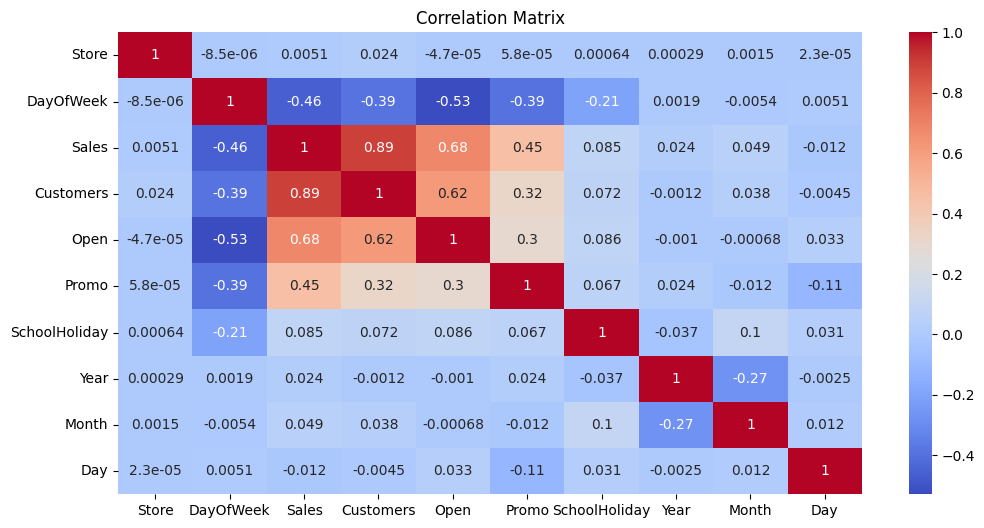

In [49]:
numeric_df_Sales = df_Sales.select_dtypes(include=[float, int])
corr_matrix = numeric_df_Sales.corr()
# Plotting heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

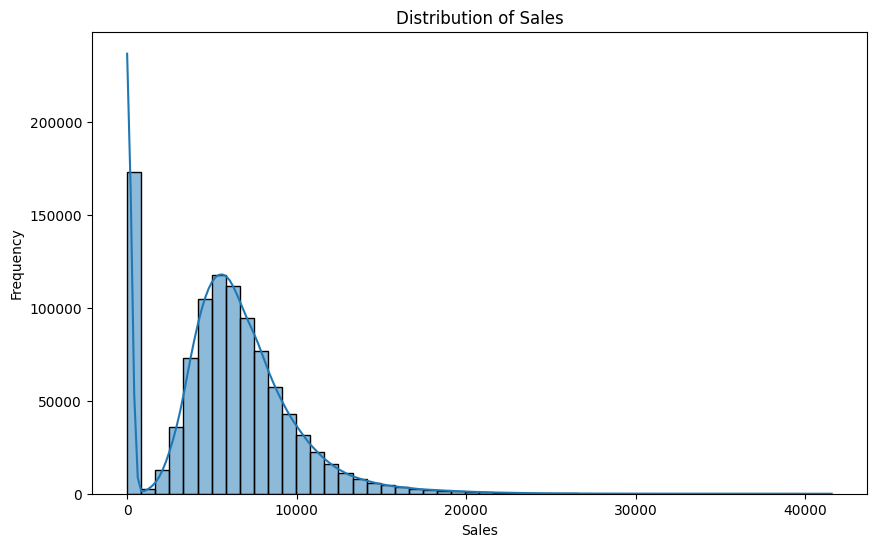

In [50]:
# Distribution of Sales
plt.figure(figsize=(10, 6))
sns.histplot(df_Sales['Sales'], bins=50, kde=True)
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

##### Above graph shows the sales are majorly between 0 and 15,000. 0 signifies of no sales.

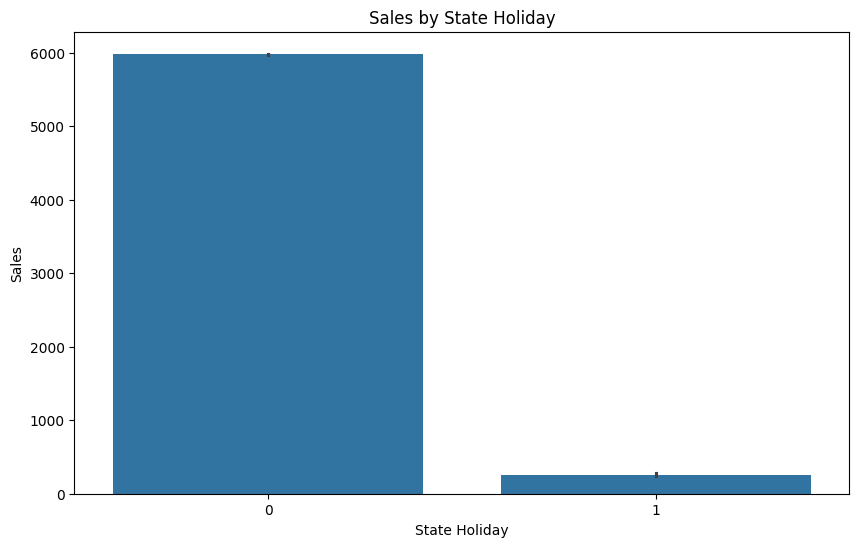

In [51]:
plt.figure(figsize=(10, 6))
sns.barplot(x='StateHoliday', y='Sales', data=df_Sales2)
plt.title('Sales by State Holiday')
plt.xlabel('State Holiday')
plt.ylabel('Sales')
plt.show()

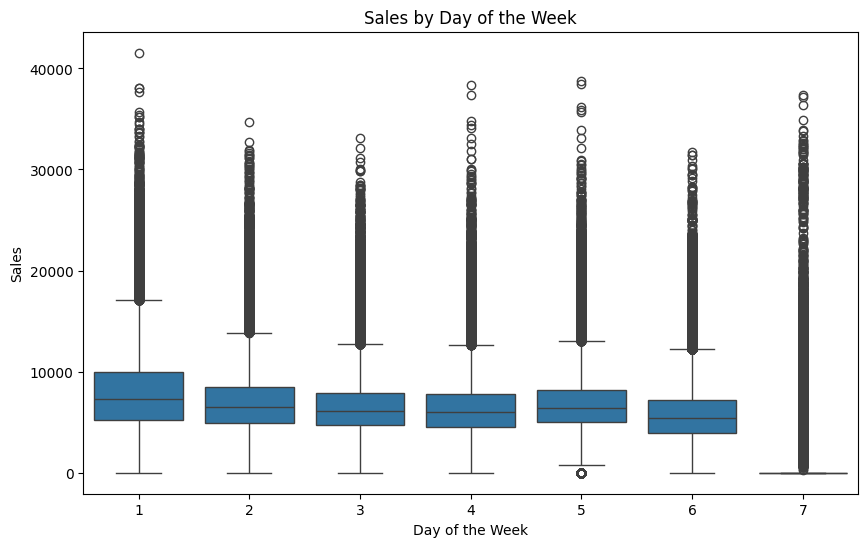

In [52]:
#Analyze how sales vary by day of the week:
plt.figure(figsize=(10, 6))
sns.boxplot(x='DayOfWeek', y='Sales', data=df_Sales)
plt.title('Sales by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Sales')
plt.show()

In [53]:
df_Sales['StateHoliday'].value_counts()

StateHoliday
0    855087
a     20260
b      6690
c      4100
Name: count, dtype: int64

##### Understanding the trend of sales over a period of time

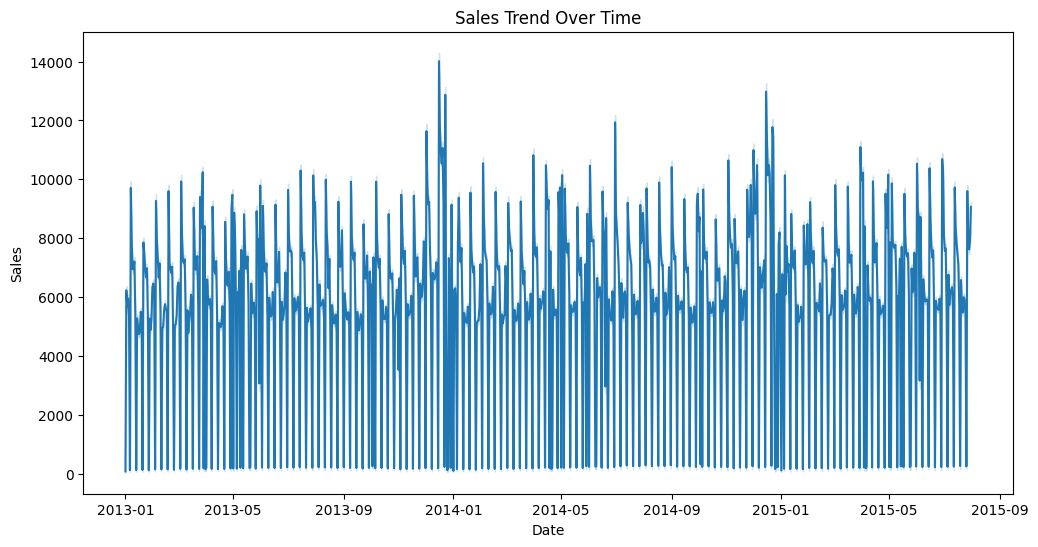

In [54]:
df_Sales['Date'] = pd.to_datetime(df_Sales['Date'])

plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Sales', data=df_Sales)
plt.title('Sales Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

##### Let's understand the sales with respect to the overall footfall of customers to understand the conversion ratio.
##### It is quite evident that the overall customer increases, the sales increases with a linear relationship between both

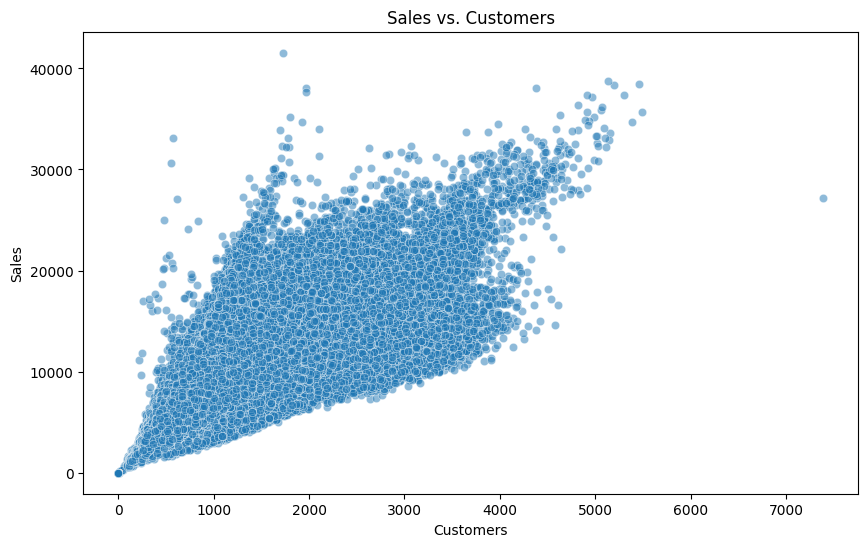

In [55]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Customers', y='Sales', data=df_Sales, alpha=0.5)
plt.title('Sales vs. Customers')
plt.xlabel('Customers')
plt.ylabel('Sales')
plt.show()

##### The below graph really indicates that when the Promotion is on, the sales increases!

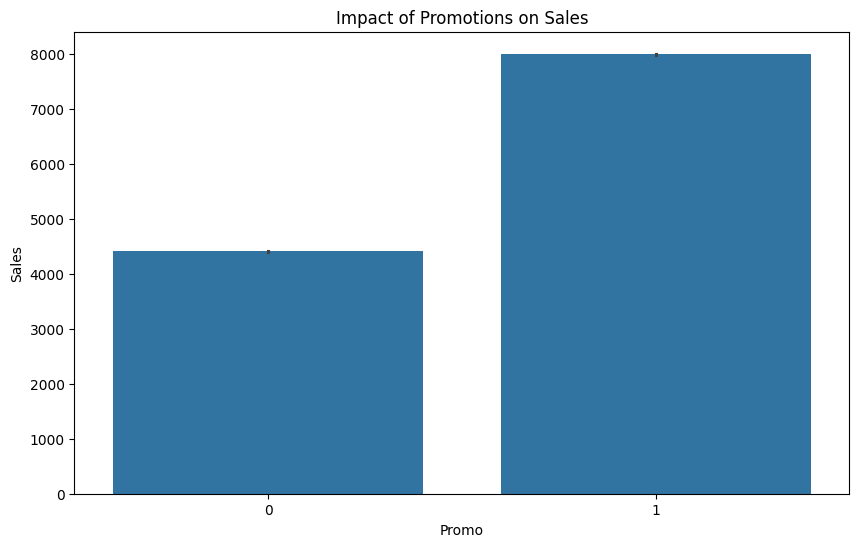

In [56]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Promo', y='Sales', data=df_Sales)
plt.title('Impact of Promotions on Sales')
plt.xlabel('Promo')
plt.ylabel('Sales')
plt.show()

##### The below code signified that the promos are kept only on weekdays.

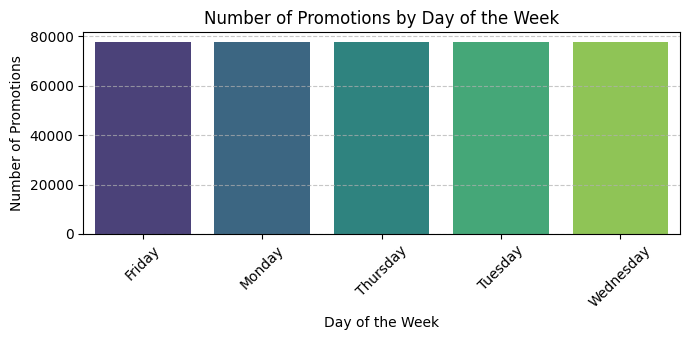

In [57]:
df_Sales['DayOfWeek'] = df_Sales['Date'].dt.dayofweek
df_Sales['DayOfWeekName'] = df_Sales['DayOfWeek'].map({0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 
                                            3: 'Thursday', 4: 'Friday', 5: 'Saturday', 
                                            6: 'Sunday'})
promo_counts = df_Sales[df_Sales['Promo'] == 1]['DayOfWeekName'].value_counts().sort_index()

plt.figure(figsize=(7, 3.5))
sns.barplot(x=promo_counts.index, y=promo_counts.values, palette='viridis')
plt.title('Number of Promotions by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Promotions')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

##### The below graph shows that the overall sales decreases over the years (Even considering 2015 has only till July end)

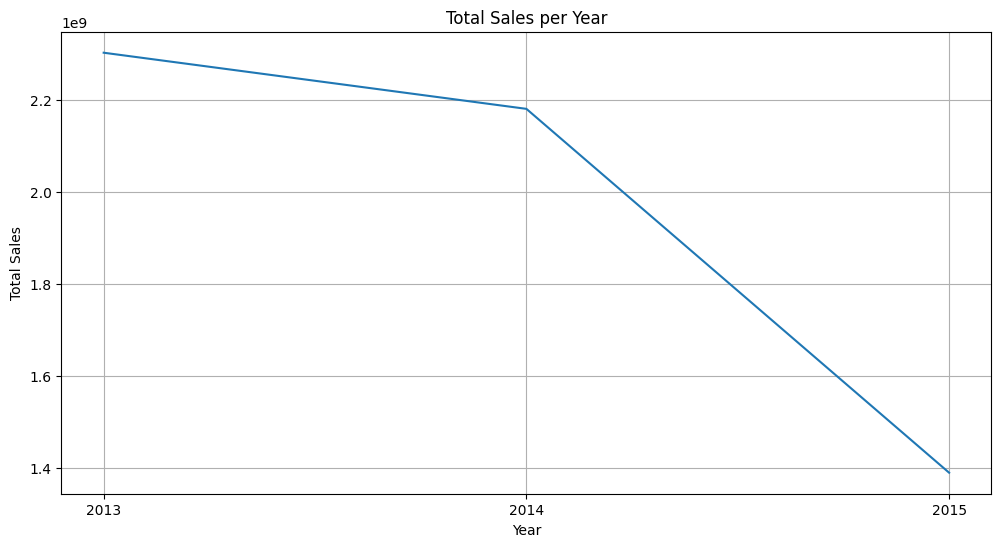

In [58]:
sales_per_year = df_Sales.groupby('Year')['Sales'].sum().reset_index()
# Plotting the line plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Sales', data=sales_per_year)
plt.title('Total Sales per Year')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.xticks(sales_per_year['Year']) 
plt.grid(True)
plt.show()

##### The sales are increasing between the months of March and July

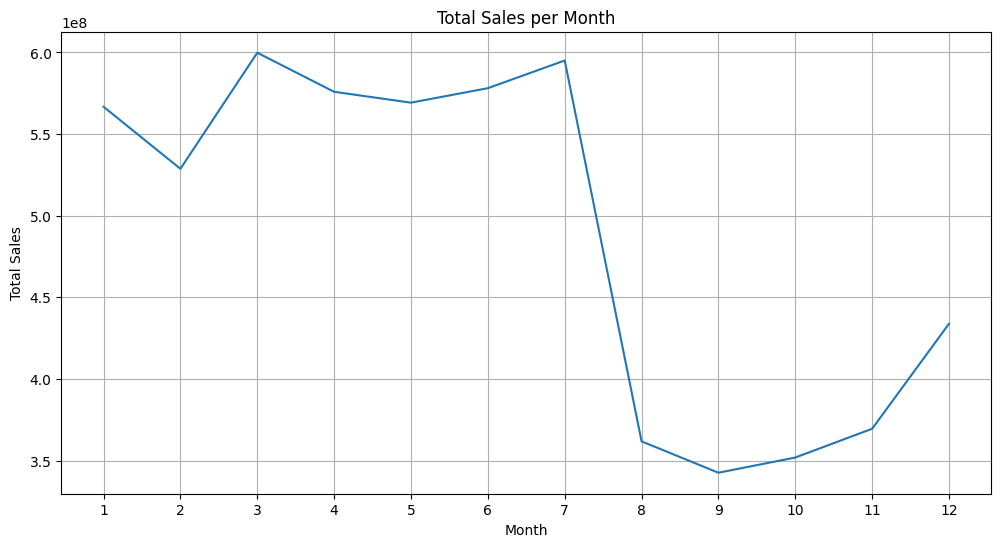

In [59]:
sales_per_month = df_Sales.groupby('Month')['Sales'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Sales', data=sales_per_month)
plt.title('Total Sales per Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(sales_per_month['Month'])
plt.grid(True)
plt.show()

##### The below graph indicates that the sales are not much impacted irrespective of school holidays

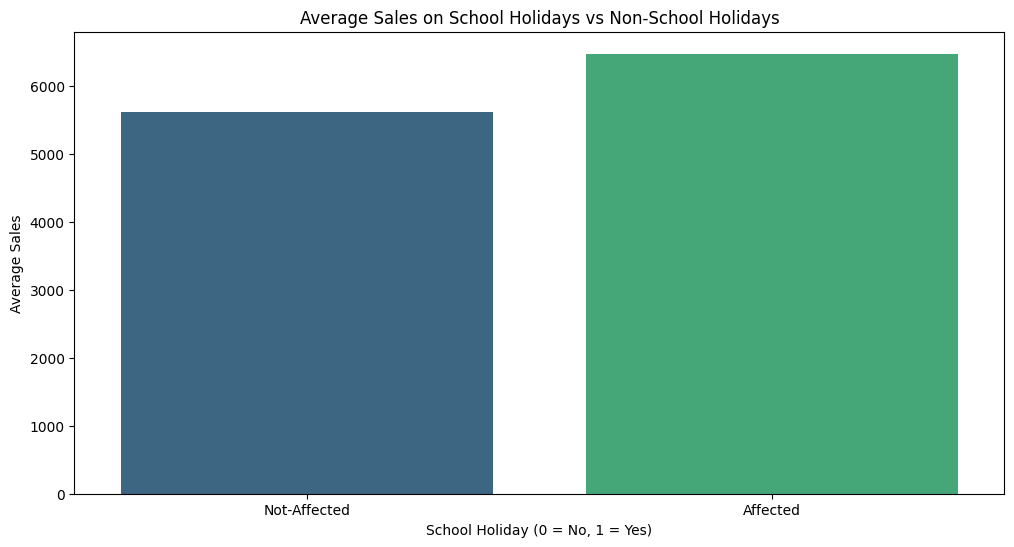

In [60]:
avg_sales_school_holiday = df_Sales.groupby('SchoolHoliday')['Sales'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='SchoolHoliday', y='Sales', data=avg_sales_school_holiday, palette='viridis')
plt.title('Average Sales on School Holidays vs Non-School Holidays')
plt.xlabel('School Holiday (0 = No, 1 = Yes)')
plt.ylabel('Average Sales')
plt.xticks([0, 1], ['Not-Affected', 'Affected'])
plt.show()

##### To perform the State Holiday to see if the Sales are impacted by it. As we identified before, the holidays comprising of Public Holiday, Easter Holiday and Christmas were 3.5% and it is quite negligeble. All these leaves can be clubbed into one.

In [61]:
df_Sales['StateHoliday'].value_counts()

StateHoliday
0    855087
a     20260
b      6690
c      4100
Name: count, dtype: int64

In [62]:
df_Sales["StateHoliday"] = df_Sales["StateHoliday"].map({"0": 0, "a": 1, "b": 1, "c": 1})

In [63]:
df_Sales['StateHoliday'].value_counts()

StateHoliday
0.0    855087
1.0     31050
Name: count, dtype: int64

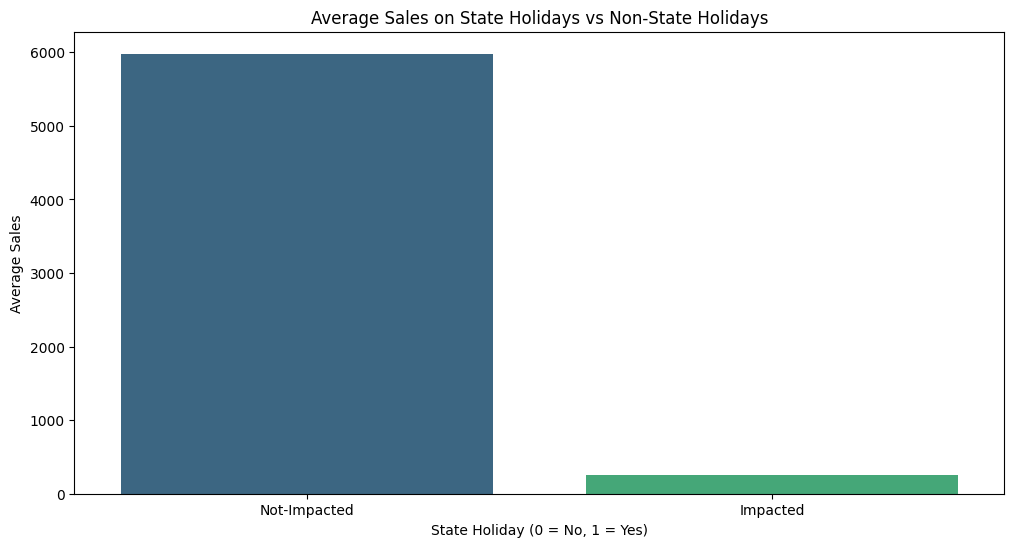

In [64]:
avg_sales_school_holiday = df_Sales.groupby('StateHoliday')['Sales'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='StateHoliday', y='Sales', data=avg_sales_school_holiday, palette='viridis')
plt.title('Average Sales on State Holidays vs Non-State Holidays')
plt.xlabel('State Holiday (0 = No, 1 = Yes)')
plt.ylabel('Average Sales')
plt.xticks([0, 1], ['Not-Impacted', 'Impacted'])
plt.show()

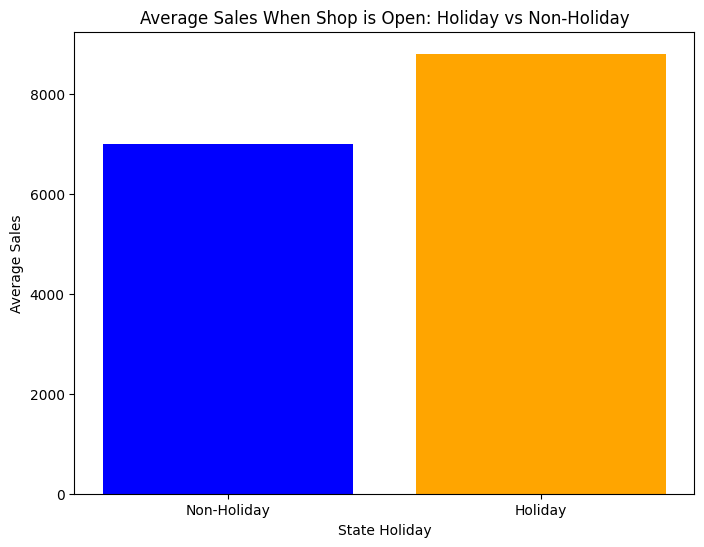

In [65]:
df_open = df_Sales[df_Sales['Open'] == 1]

# Group by 'StateHoliday' and calculate the mean of 'Sales'
avg_sales = df_open.groupby('StateHoliday')['Sales'].mean().reset_index()

# Create a bar graph
plt.figure(figsize=(8, 6))
plt.bar(avg_sales['StateHoliday'].astype(str), avg_sales['Sales'], color=['blue', 'orange'])

# Adding titles and labels
plt.title('Average Sales When Shop is Open: Holiday vs Non-Holiday')
plt.xlabel('State Holiday')
plt.ylabel('Average Sales')
plt.xticks(ticks=[0, 1], labels=['Non-Holiday', 'Holiday'])

# Display the plot
plt.show()

##### As per the analysis above, since the sales are not much affected by the state holiday, we are dropping the same for better model prediction

In [66]:
df_Sales.drop('StateHoliday',inplace=True,axis=1)

In [67]:
df_Sales

Store  DayOfWeek       Date  Sales  Customers  Open  Promo  \
0            1          4 2015-07-31   5263        555     1      1   
1            2          4 2015-07-31   6064        625     1      1   
2            3          4 2015-07-31   8314        821     1      1   
3            4          4 2015-07-31  13995       1498     1      1   
4            5          4 2015-07-31   4822        559     1      1   
...        ...        ...        ...    ...        ...   ...    ...   
1017204   1111          1 2013-01-01      0          0     0      0   
1017205   1112          1 2013-01-01      0          0     0      0   
1017206   1113          1 2013-01-01      0          0     0      0   
1017207   1114          1 2013-01-01      0          0     0      0   
1017208   1115          1 2013-01-01      0          0     0      0   

         SchoolHoliday  Year  Month  Day  WeekOfYear DayOfWeekName  
0                    1  2015      7   31          31        Friday  
1                    1  2015      7   31          31        Friday  
2                    1  2015      7   31          31        Friday  
3                    1  2015      7   31          31        Friday  
4                    1  2015      7   31          31        Friday  
...                ...   ...    ...  ...         ...           ...  
1017204              1  2013      1    1           1       Tuesday  
1017205              1  2013      1    1           1       Tuesday  
1017206              1  2013      1    1           1       Tuesday  
1017207              1  2013      1    1           1       Tuesday  
1017208              1  2013      1    1           1       Tuesday  

[1017209 rows x 13 columns]

##### EDA for DF_STORE Data Frame

In [68]:
df_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [69]:
df_store.describe()

Store  CompetitionDistance  CompetitionOpenSinceMonth  \
count  1115.00000          1112.000000                 761.000000   
mean    558.00000          5404.901079                   7.224704   
std     322.01708          7663.174720                   3.212348   
min       1.00000            20.000000                   1.000000   
25%     279.50000           717.500000                   4.000000   
50%     558.00000          2325.000000                   8.000000   
75%     836.50000          6882.500000                  10.000000   
max    1115.00000         75860.000000                  12.000000   

       CompetitionOpenSinceYear       Promo2  Promo2SinceWeek  Promo2SinceYear  
count                761.000000  1115.000000       571.000000       571.000000  
mean                2008.668857     0.512108        23.595447      2011.763573  
std                    6.195983     0.500078        14.141984         1.674935  
min                 1900.000000     0.000000         1.000000      2009.000000  
25%                 2006.000000     0.000000        13.000000      2011.000000  
50%                 2010.000000     1.000000        22.000000      2012.000000  
75%                 2013.000000     1.000000        37.000000      2013.000000  
max                 2015.000000     1.000000        50.000000      2015.000000

Exploring Store Types

In [70]:
df_store['StoreType'].value_counts()

StoreType
a    602
d    348
c    148
b     17
Name: count, dtype: int64

##### The Store Types are not highly skewed to A,B,C or D

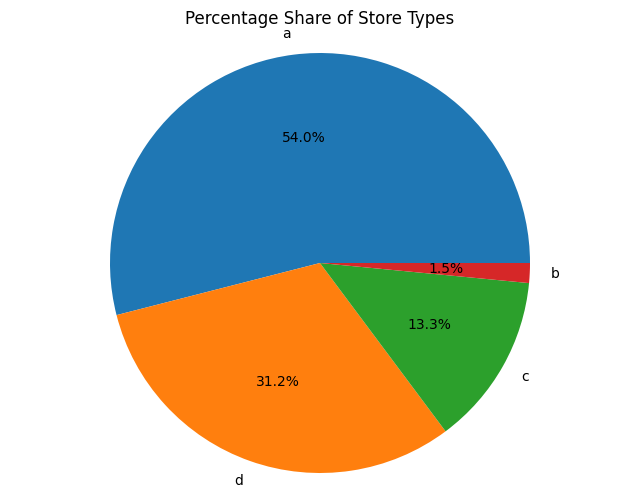

In [71]:
store_type_counts = df_store['StoreType'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(store_type_counts, labels=store_type_counts.index, autopct='%1.1f%%')
plt.title('Percentage Share of Store Types')
plt.axis('equal')
plt.show()

In [72]:
df_store.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [73]:
#df_store2.isnull().sum()

In [74]:
df_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


##### Since the Competition Distance is right skewed and has outliers, replacing the missing values with Median value

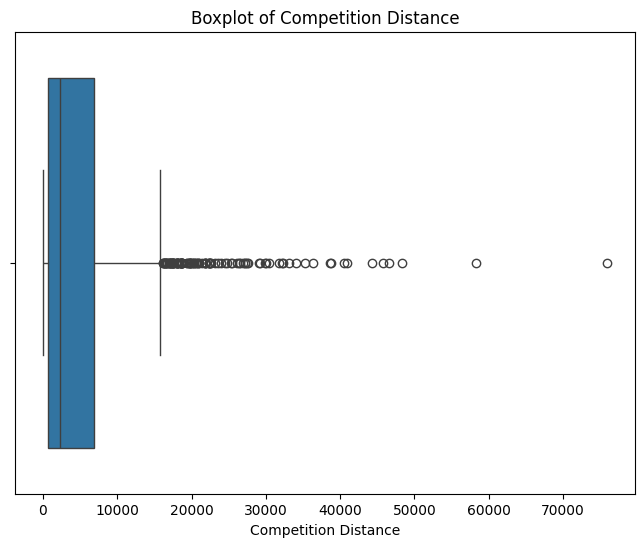

In [75]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_store['CompetitionDistance'])
plt.title('Boxplot of Competition Distance')
plt.xlabel('Competition Distance')
plt.show()

In [76]:
median_distance = df_store['CompetitionDistance'].median()

In [77]:
df_store['CompetitionDistance'].fillna(median_distance, inplace=True)

In [78]:
df_store.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            0
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [79]:
#df_store2.isnull().sum()

In [80]:
# Replicating the same for the copied data frame df_store2

#median_distance2 = df_store2['CompetitionDistance'].median()
#df_store2['CompetitionDistance'].fillna(median_distance2, inplace=True)

##### Checking Assortment Field

##### By observing the Assetment types with respect to the overall Store Types available. A and C (Basic and Extended) are widely used and B (Extra) is only used on Store Type 'B'. Therefore Store Type 'B' has not only less stores among other stores but also the only store type to use 'extra' segment products.

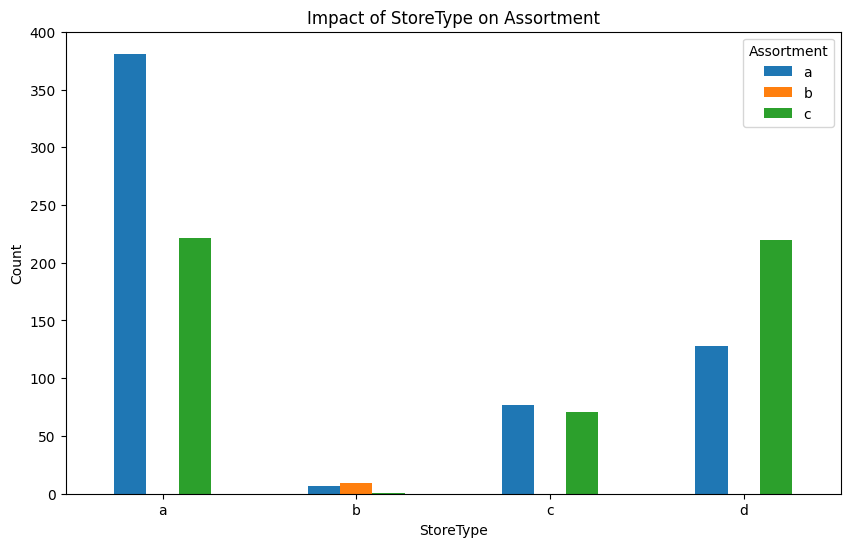

In [81]:
grouped_data = df_store.groupby(['StoreType', 'Assortment']).size().unstack(fill_value=0)
grouped_data.plot(kind='bar', figsize=(10, 6))
plt.title('Impact of StoreType on Assortment')
plt.xlabel('StoreType')
plt.ylabel('Count')
plt.legend(title='Assortment')
plt.xticks(rotation=0)
plt.show()

##### Now merging both df_store and df_Sales Datasets

In [82]:
df = pd.merge(df_Sales, df_store, how='left', on='Store')
df.head(2)

Store  DayOfWeek       Date  Sales  Customers  Open  Promo  SchoolHoliday  \
0      1          4 2015-07-31   5263        555     1      1              1   
1      2          4 2015-07-31   6064        625     1      1              1   

   Year  Month  ...  DayOfWeekName  StoreType Assortment CompetitionDistance  \
0  2015      7  ...         Friday          c          a              1270.0   
1  2015      7  ...         Friday          a          a               570.0   

  CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                       9.0                    2008.0       0   
1                      11.0                    2007.0       1   

   Promo2SinceWeek  Promo2SinceYear    PromoInterval  
0              NaN              NaN              NaN  
1             13.0           2010.0  Jan,Apr,Jul,Oct  

[2 rows x 22 columns]

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 22 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int32         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   SchoolHoliday              1017209 non-null  int64         
 8   Year                       1017209 non-null  int32         
 9   Month                      1017209 non-null  int32         
 10  Day                        1017209 non-null  int32         
 11  WeekOfYear                 1017209 no

In [84]:
df.shape

(1017209, 22)

In [85]:
# Replicating the same for the df_store. Here df_store is the dataframe which didn't have the missing values based featured dropped
df_final = pd.merge(df_Sales, df_store, how='left', on='Store')
df_final.head(2)

Store  DayOfWeek       Date  Sales  Customers  Open  Promo  SchoolHoliday  \
0      1          4 2015-07-31   5263        555     1      1              1   
1      2          4 2015-07-31   6064        625     1      1              1   

   Year  Month  ...  DayOfWeekName  StoreType Assortment CompetitionDistance  \
0  2015      7  ...         Friday          c          a              1270.0   
1  2015      7  ...         Friday          a          a               570.0   

  CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                       9.0                    2008.0       0   
1                      11.0                    2007.0       1   

   Promo2SinceWeek  Promo2SinceYear    PromoInterval  
0              NaN              NaN              NaN  
1             13.0           2010.0  Jan,Apr,Jul,Oct  

[2 rows x 22 columns]

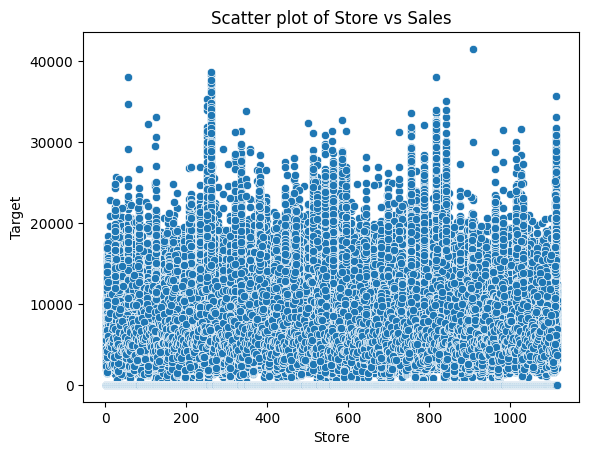

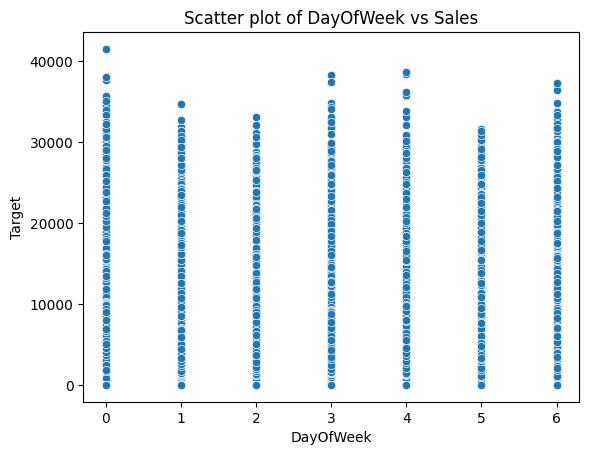

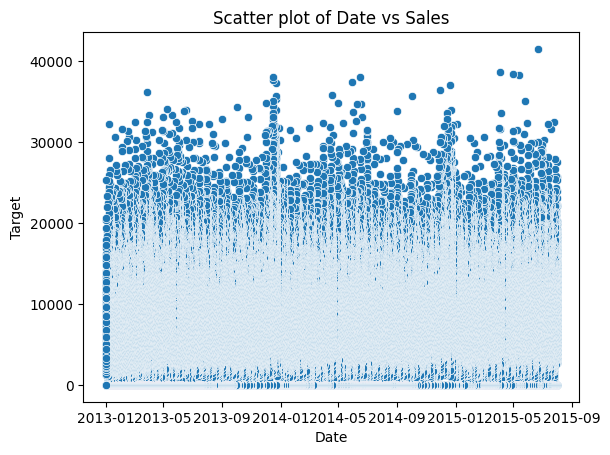

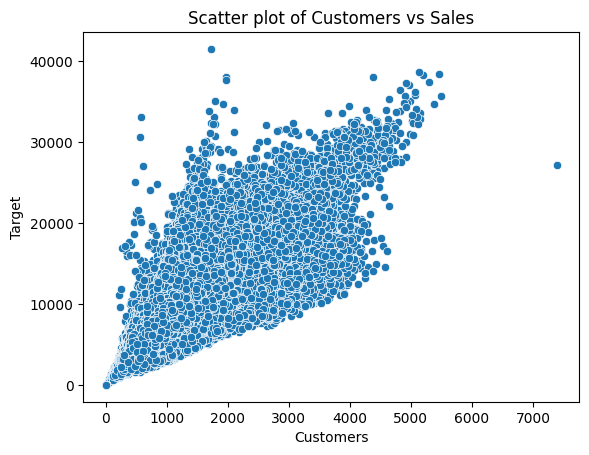

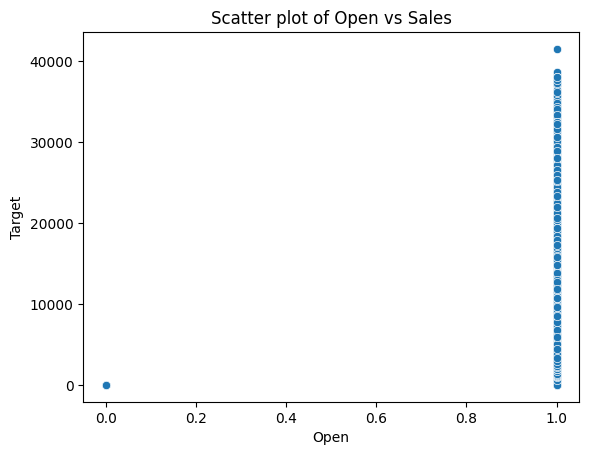

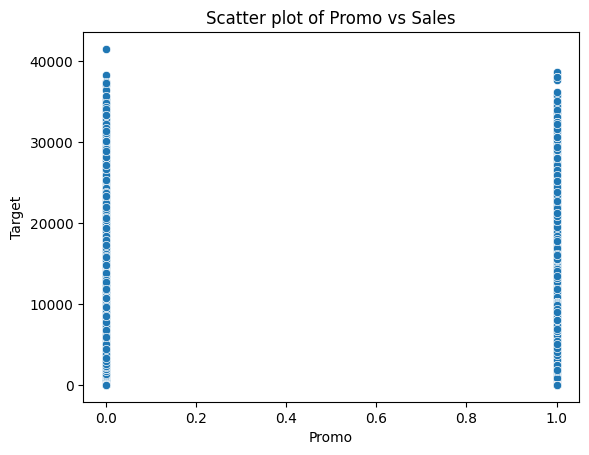

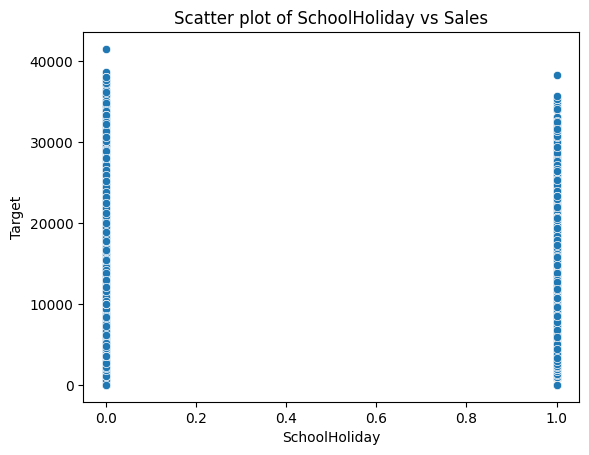

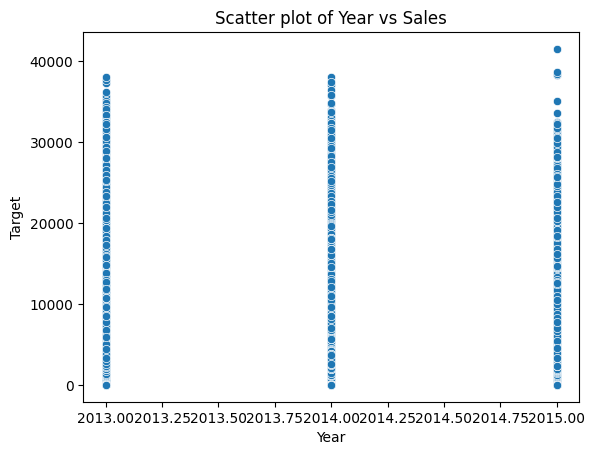

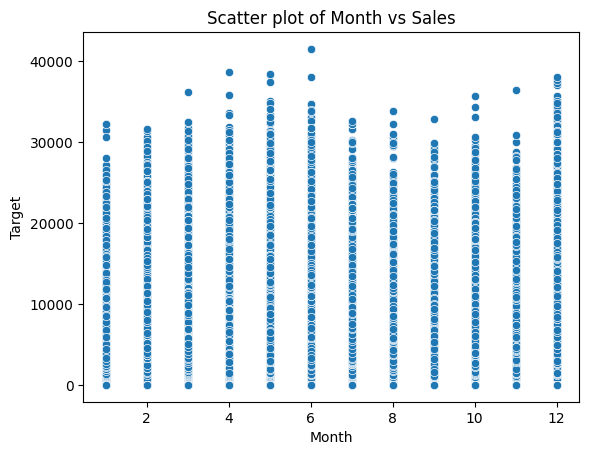

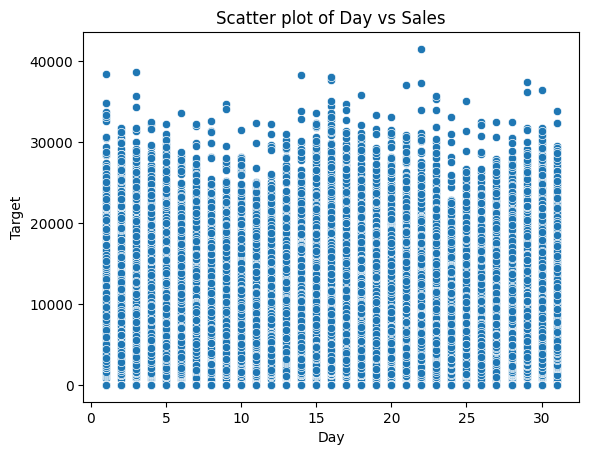

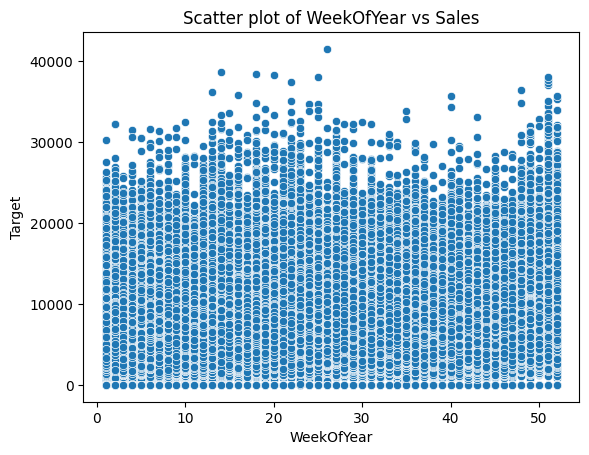

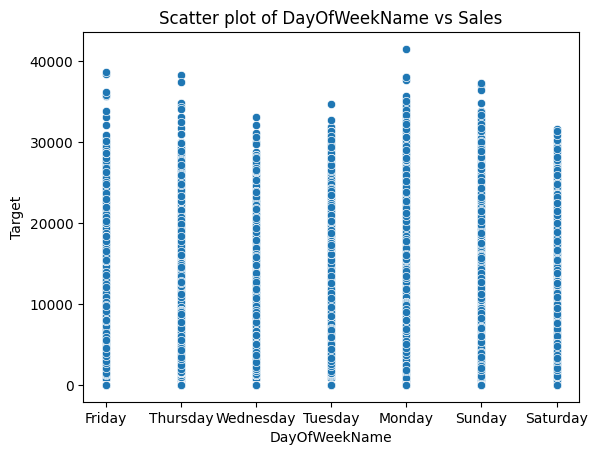

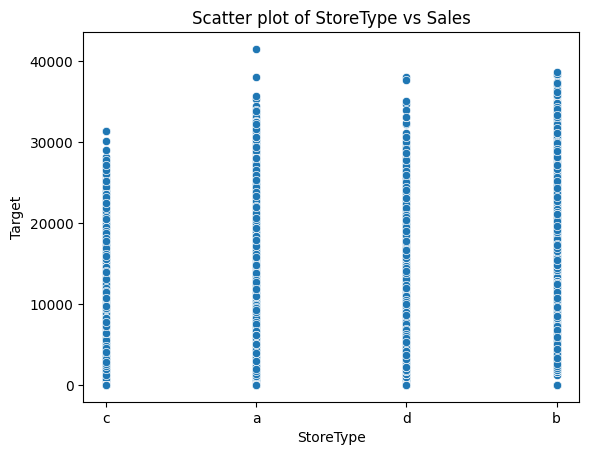

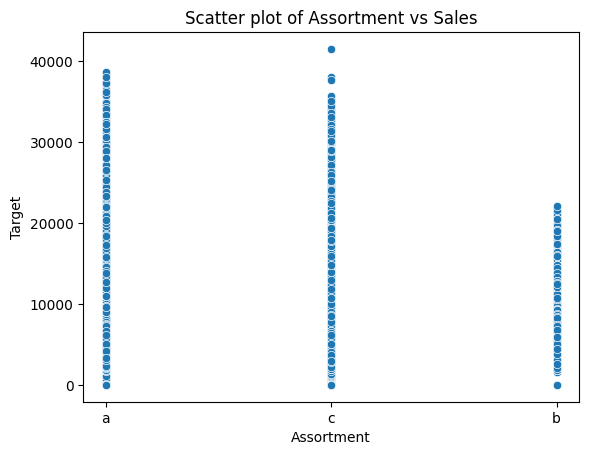

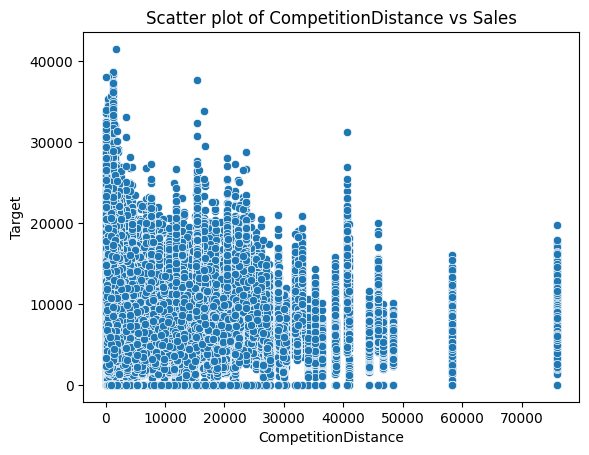

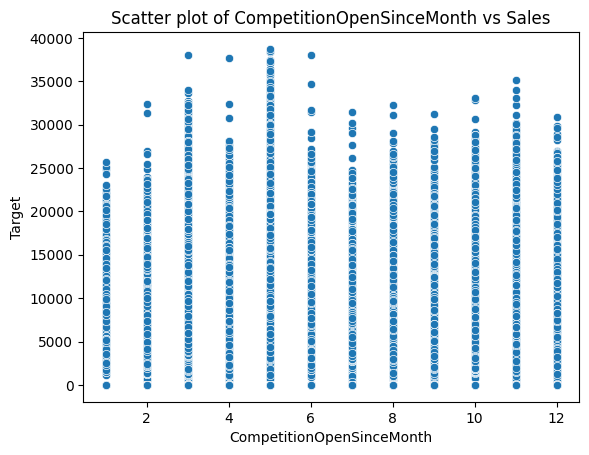

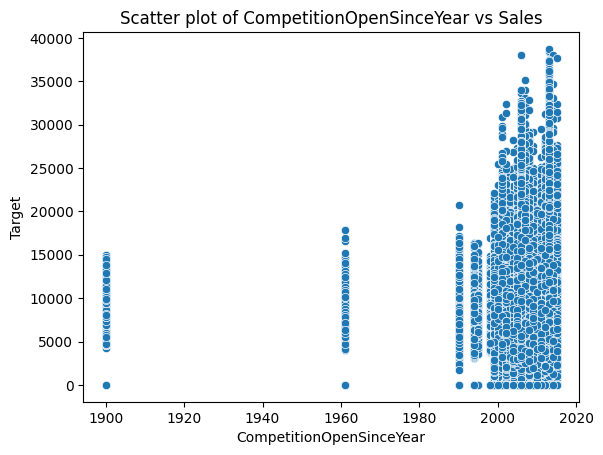

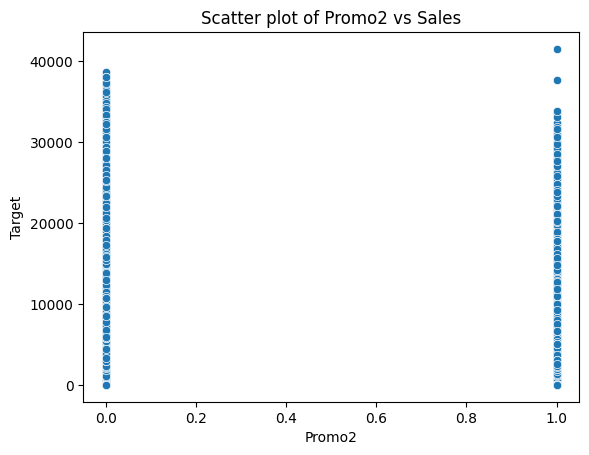

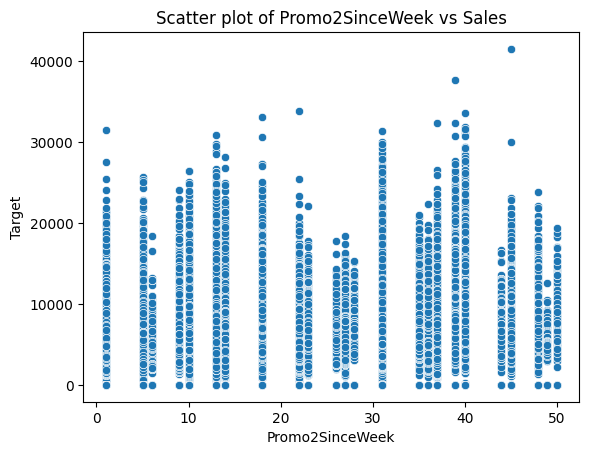

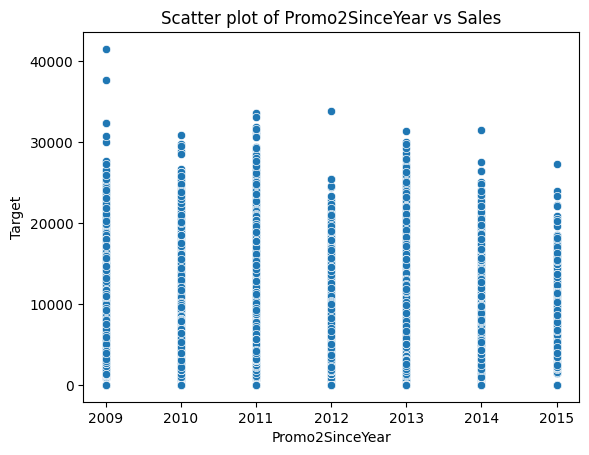

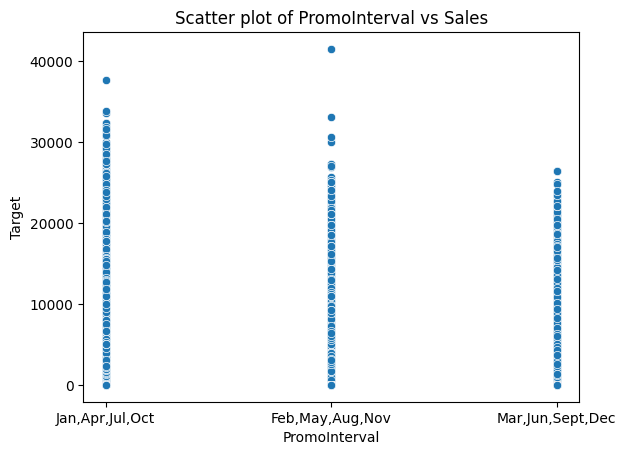

In [86]:
for column in df.columns:
    if column != 'Sales':
        sns.scatterplot(x=df[column], y=df['Sales'])
        plt.title(f'Scatter plot of {column} vs Sales')
        plt.xlabel(column)
        plt.ylabel('Target')
        plt.show()

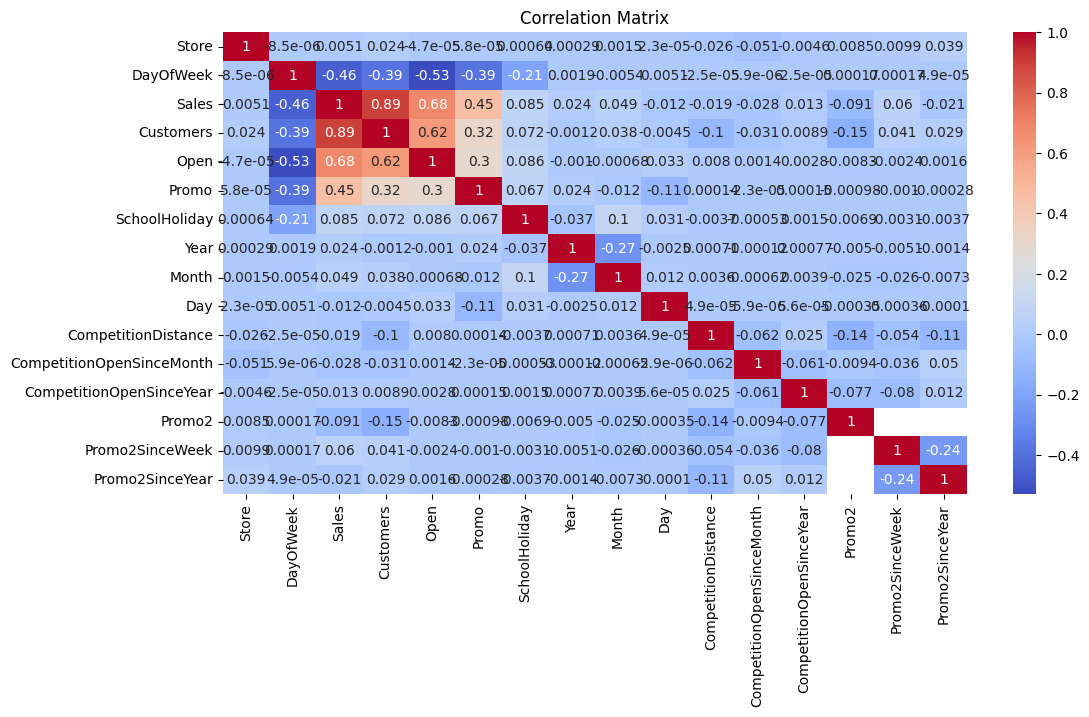

In [87]:
numeric_df = df.select_dtypes(include=[float, int])
corr_matrix = numeric_df.corr()
# Plotting heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

##### From the below heat map, the features: CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2SinceWeek,Promo2SinceYear has almost 0 correlation (Between -0.1 to +0.1) with other features and has atleast 30% or more data missing. On the basis of these, it is better to drop those feature as these features doesn't add anything to the model power. Thereby df_final (which is a copy) of df will be refrained from using. DF will be used (as it already has those features removed)

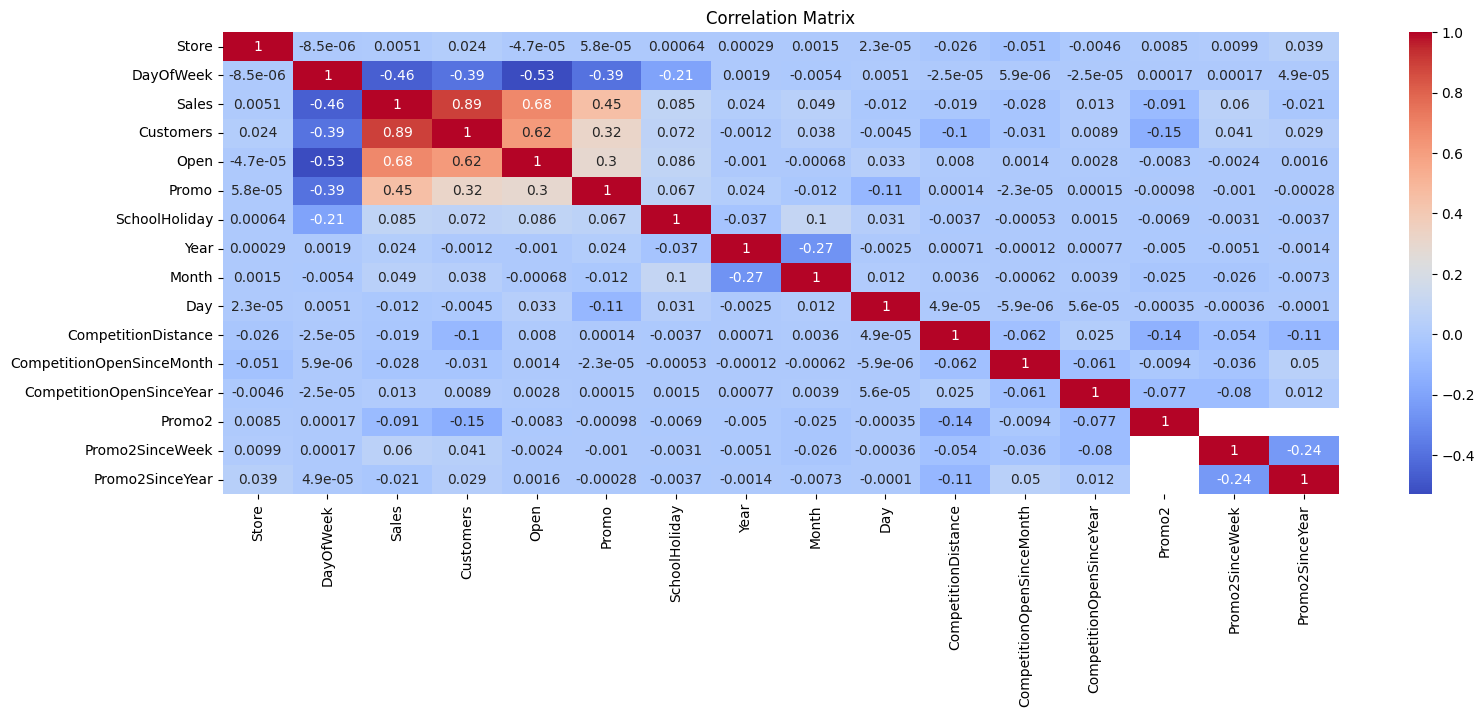

In [88]:
numeric_df2 = df_final.select_dtypes(include=[float, int])
corr_matrix2 = numeric_df2.corr()
# Plotting heatmap
plt.figure(figsize=(18, 6))
sns.heatmap(corr_matrix2, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [89]:
df.isnull().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
SchoolHoliday                     0
Year                              0
Month                             0
Day                               0
WeekOfYear                        0
DayOfWeekName                     0
StoreType                         0
Assortment                        0
CompetitionDistance               0
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
dtype: int64

In [90]:
duplicate_rows = df.duplicated()

# Print the boolean Series to see which rows are duplicates
print(duplicate_rows)

# Check if there are any duplicates
has_duplicates = duplicate_rows.any()
print(f"Does the dataset have duplicate rows? {has_duplicates}")

0          False
1          False
2          False
3          False
4          False
           ...  
1017204    False
1017205    False
1017206    False
1017207    False
1017208    False
Length: 1017209, dtype: bool
Does the dataset have duplicate rows? False


In [91]:
df["Avg_Customer_Sales"] = (df.Sales/df.Customers)*100

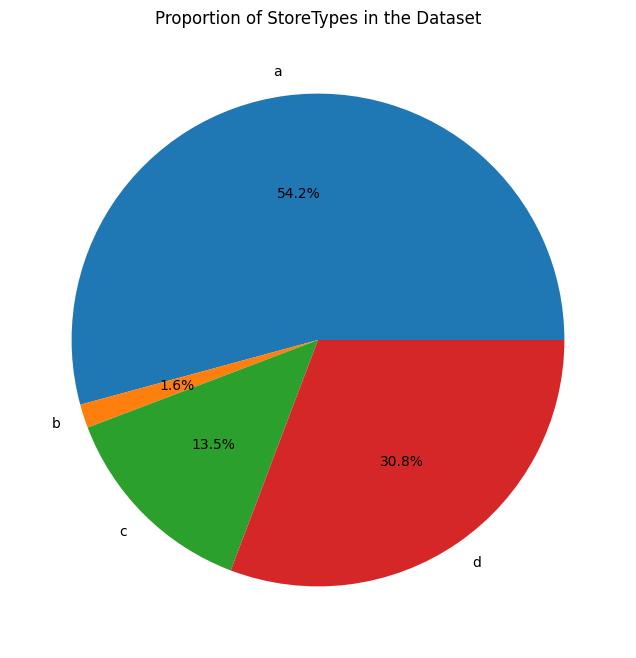

In [92]:
store_counts = df.groupby("StoreType")["Store"].count()
# Plotting the pie chart
plt.figure(figsize=(8, 8))
store_counts.plot(kind='pie', autopct='%1.1f%%', title='Proportion of StoreTypes in the Dataset')
plt.ylabel('')  # Remove the default ylabel
plt.show()

In [93]:
df_columns = [column for column in df.columns if df[column].dtype != 'object' and 'Date' not in column]

In [94]:
df_columns

['Store',
 'DayOfWeek',
 'Sales',
 'Customers',
 'Open',
 'Promo',
 'SchoolHoliday',
 'Year',
 'Month',
 'Day',
 'WeekOfYear',
 'CompetitionDistance',
 'CompetitionOpenSinceMonth',
 'CompetitionOpenSinceYear',
 'Promo2',
 'Promo2SinceWeek',
 'Promo2SinceYear',
 'Avg_Customer_Sales']

##### Observing the Store Type

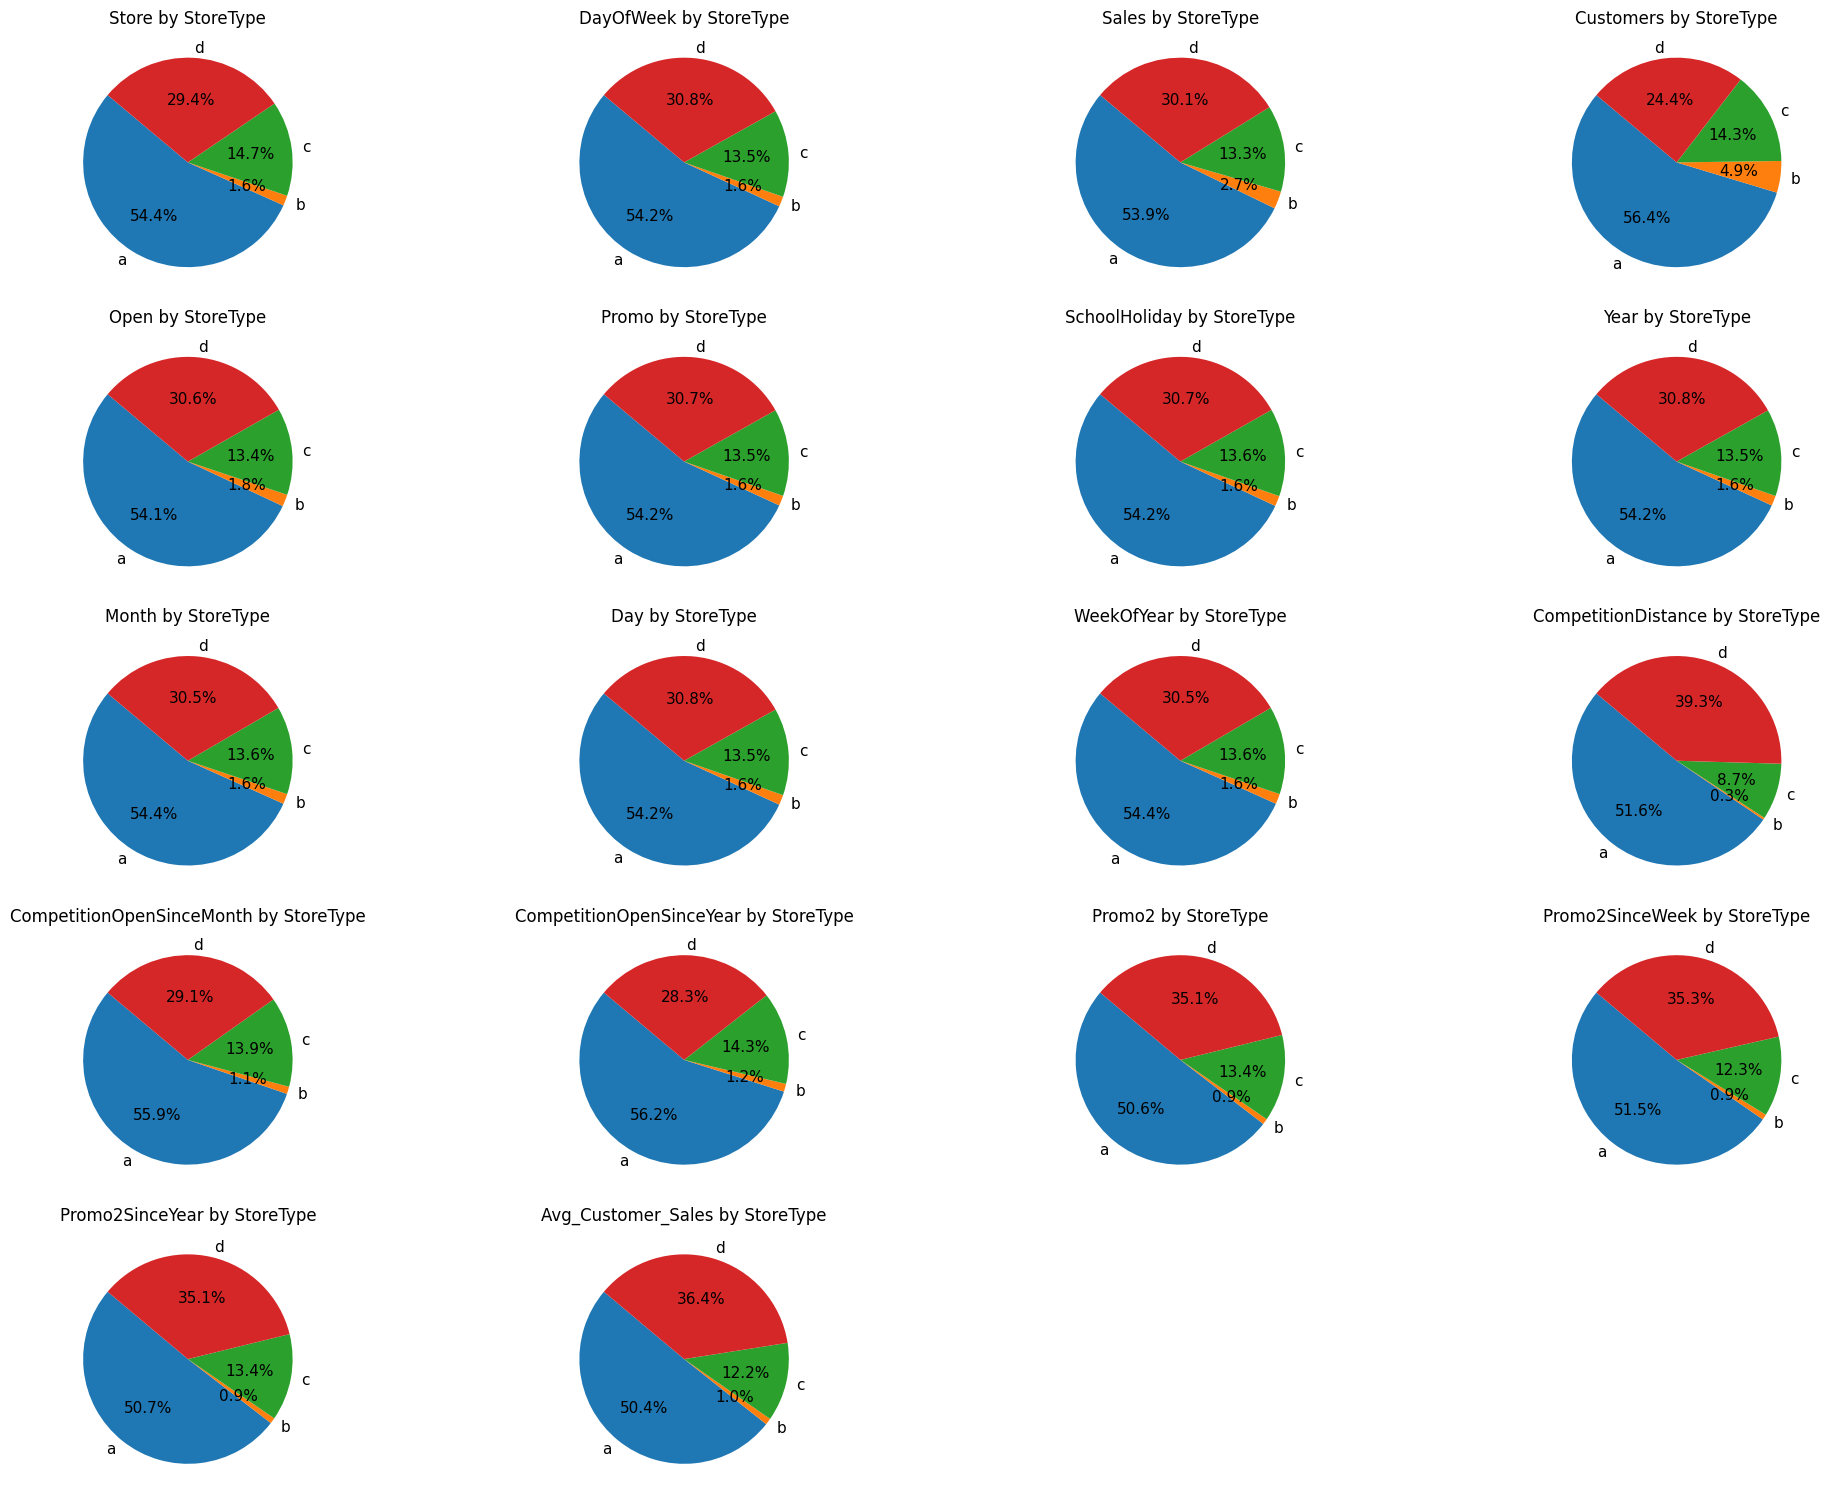

In [95]:
plt.figure(figsize=(20, 3 * len(df_columns)))

for i, feature in enumerate(df_columns):
    # Create subplots one below the other
    plt.subplot(len(df_columns), 4, i + 1)
    
    # Check if the feature column contains numeric data
    if pd.api.types.is_numeric_dtype(df[feature]):
        grouped_data = df.groupby('StoreType')[feature].sum()
        plt.pie(grouped_data, labels=grouped_data.index, autopct='%1.1f%%', startangle=140,textprops={'fontsize': 11})
        plt.title(f'{feature} by StoreType')
    else:
        print(f"Skipping feature '{feature}' as it is not numeric.")

# Adjust layout
plt.tight_layout()
plt.show()

##### Things Observed from the above charts
##### Store 'A' has most stores and most than 50% of composition in all the data with 30% with Store 'D'

In [96]:
df["Sales_Average"] = df.Sales/df.Customers

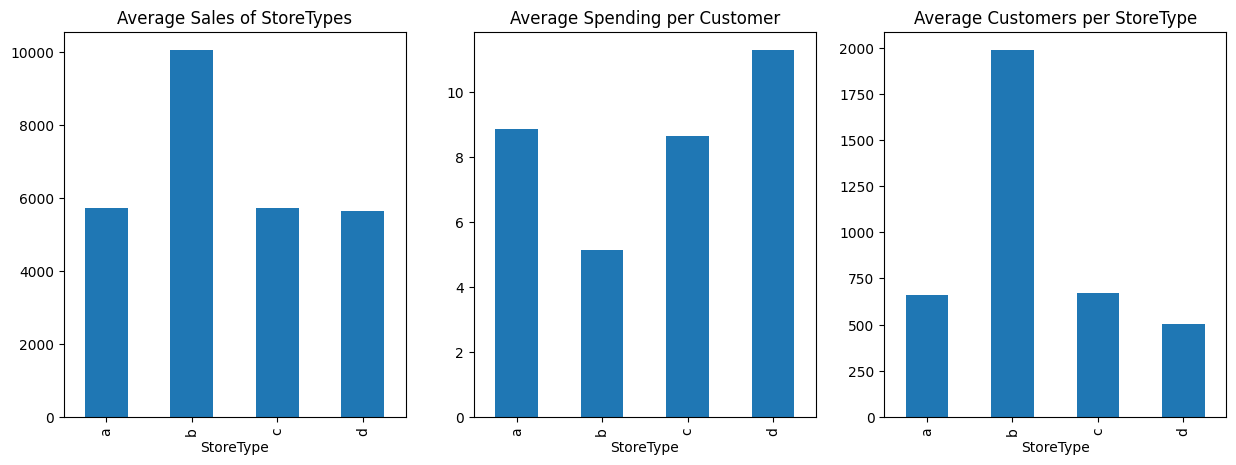

In [97]:
f, ax = plt.subplots(1, 3, figsize = (15,5))

df.groupby("StoreType")["Sales"].mean().plot(kind = "bar", ax = ax[0], title = "Average Sales of StoreTypes")
df.groupby("StoreType")["Sales_Average"].mean().plot(kind = "bar", ax = ax[1], title = "Average Spending per Customer")
df.groupby("StoreType")["Customers"].mean().plot(kind = "bar", ax = ax[2], title = "Average Customers per StoreType")

plt.subplots_adjust(hspace = 0.3)
plt.show()

##### Above graph indicates that despite Store A having maximum composition in all metrics, when it comes to Average Sales per customer on a day and Average customer per Store Type, Store B tops. Average spending power of a customer is higher in store D

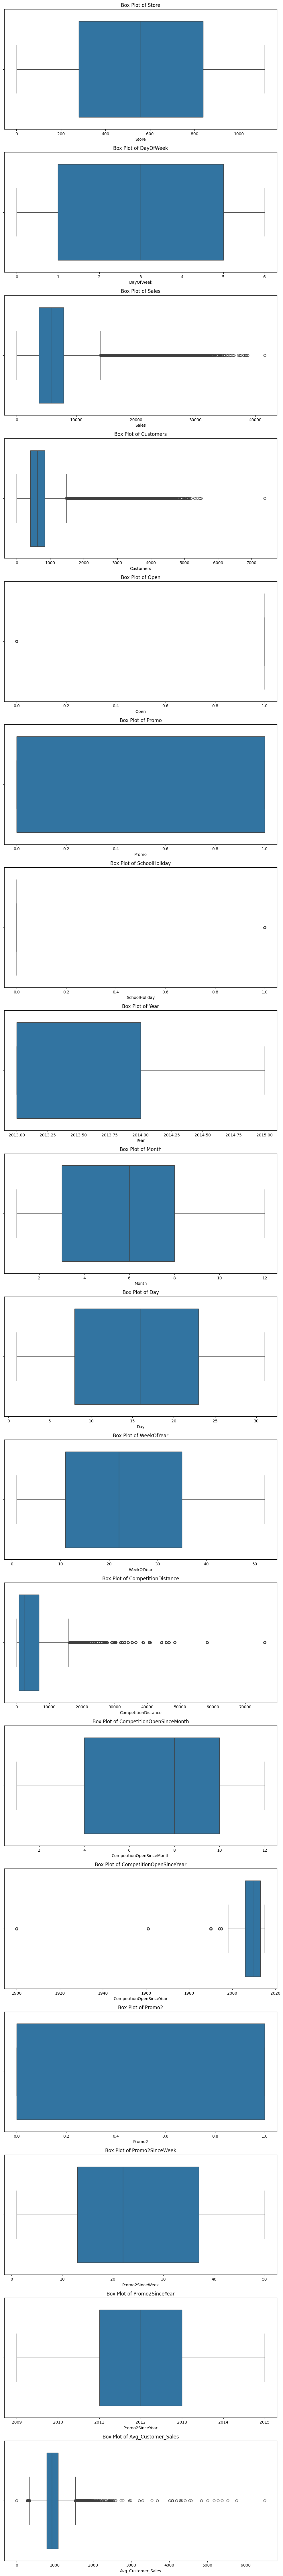

In [98]:
num_columns = len(df_columns)
fig, axes = plt.subplots(nrows=num_columns, ncols=1, figsize=(10, 5 * num_columns))

for i, column in enumerate(df_columns):
    sns.boxplot(x=df[column], ax=axes[i])
    axes[i].set_title(f'Box Plot of {column}')
    axes[i].set_xlabel(column)

plt.tight_layout()
plt.show()

##### Using IQR to valide the outlier values for Sales as displayed on the above graphs

In [99]:
Q1 = df['Sales'].quantile(0.25)
Q3 = df['Sales'].quantile(0.75)

IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['Sales'] < lower_bound) | (df['Sales'] > upper_bound)]
percentage_outliers = (len(outliers) / len(df)) * 100
print(f"Percentage of outliers in 'Sales': {percentage_outliers:.2f}%")
outlier_values_sales = outliers['Sales'].values
print("Outlier values in 'Sales':")
print(outlier_values_sales)

Percentage of outliers in 'Sales': 2.62%
Outlier values in 'Sales':
[15344 14190 14180 ... 20355 20642 17267]


In [100]:
Q1 = df['Customers'].quantile(0.25)
Q3 = df['Customers'].quantile(0.75)

IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['Customers'] < lower_bound) | (df['Customers'] > upper_bound)]
percentage_outliers = (len(outliers) / len(df)) * 100
print(f"Percentage of outliers in 'Customers': {percentage_outliers:.2f}%")
outlier_values = outliers['Customers'].values
print("Outlier values in 'Customers':")
print(outlier_values)

Percentage of outliers in 'Customers': 3.75%
Outlier values in 'Customers':
[1498 1586 2041 ... 1751 1675 2377]


In [101]:
Q1 = df['CompetitionDistance'].quantile(0.25)
Q3 = df['CompetitionDistance'].quantile(0.75)

IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df_Sales[(df['CompetitionDistance'] < lower_bound) | (df['CompetitionDistance'] > upper_bound)]
percentage_outliers = (len(outliers) / len(df)) * 100
print(f"Percentage of outliers in 'CompetitionDistance': {percentage_outliers:.2f}%")

Percentage of outliers in 'CompetitionDistance': 9.75%


##### Sales and Customers have close to 3%, but Competition Distance has almost 10% outliers. Keeping Competition Distance as it is because the outlier values has varied patterns across other features.

In [102]:
df_store_outliers=df[df['Customers'] > 4500]
df_store_outliers['Store'].value_counts()

Store
262     71
1114     5
769      3
817      3
586      2
733      2
251      1
Name: count, dtype: int64

##### The 'Customers' column has 3.75% outliers. We will keep it as it is but when we look into the extreme outlier values (Values with customers > 45000), More than 80% of which comes from Store no: 262. So we are dropping Store no: 262 as store 262 in average has way more customer foot fall than an average store, this is done for better model predictability.

In [103]:
df[df['Store']==262]['Customers'].mean()

3402.0106157112527

In [104]:
df[df['Store']!=262]['Customers'].mean()

630.5794254856253

In [105]:
df2=df.copy()

In [106]:
indices_to_drop = df[df['Store'] == 262].index
df.drop(indices_to_drop, inplace=True, axis=0)

In [107]:
df[df['Store']==262]

Empty DataFrame
Columns: [Store, DayOfWeek, Date, Sales, Customers, Open, Promo, SchoolHoliday, Year, Month, Day, WeekOfYear, DayOfWeekName, StoreType, Assortment, CompetitionDistance, CompetitionOpenSinceMonth, CompetitionOpenSinceYear, Promo2, Promo2SinceWeek, Promo2SinceYear, PromoInterval, Avg_Customer_Sales, Sales_Average]
Index: []

[0 rows x 24 columns]

As per the outlier boxplot above, sales is a dependant variable and has high outliers, so we are replacing sales outlier values with Median

<Axes: ylabel='Sales'>

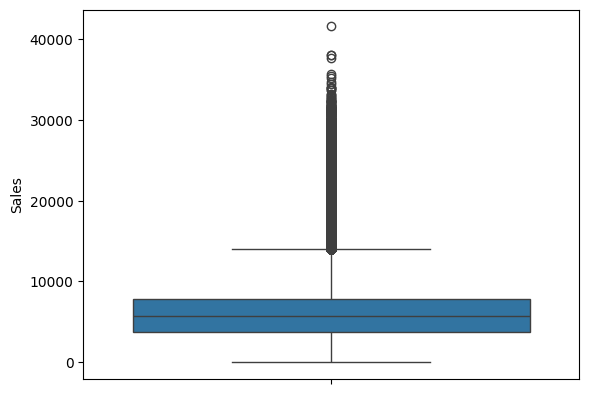

In [108]:
sns.boxplot(df['Sales'])

In [109]:
outlier_values_sales

array([15344, 14190, 14180, ..., 20355, 20642, 17267], dtype=int64)

##### The Sales outliers values which were previously store in 'outlier_values_sales' were dropped with its entire rows

In [110]:
outlier_indices = df[df['Sales'].isin(outlier_values_sales)].index
df.drop(outlier_indices, inplace=True, axis=0)
print(df)

         Store  DayOfWeek       Date  Sales  Customers  Open  Promo  \
0            1          4 2015-07-31   5263        555     1      1   
1            2          4 2015-07-31   6064        625     1      1   
2            3          4 2015-07-31   8314        821     1      1   
3            4          4 2015-07-31  13995       1498     1      1   
4            5          4 2015-07-31   4822        559     1      1   
...        ...        ...        ...    ...        ...   ...    ...   
1017204   1111          1 2013-01-01      0          0     0      0   
1017205   1112          1 2013-01-01      0          0     0      0   
1017206   1113          1 2013-01-01      0          0     0      0   
1017207   1114          1 2013-01-01      0          0     0      0   
1017208   1115          1 2013-01-01      0          0     0      0   

         SchoolHoliday  Year  Month  ...  Assortment  CompetitionDistance  \
0                    1  2015      7  ...           a               127

##### Observing Competition Distance with regard to the sales

In [111]:
df['CompetitionDistance'].describe().round(2)

count    990512.00
mean       5471.93
std        7720.17
min          20.00
25%         720.00
50%        2380.00
75%        6910.00
max       75860.00
Name: CompetitionDistance, dtype: float64

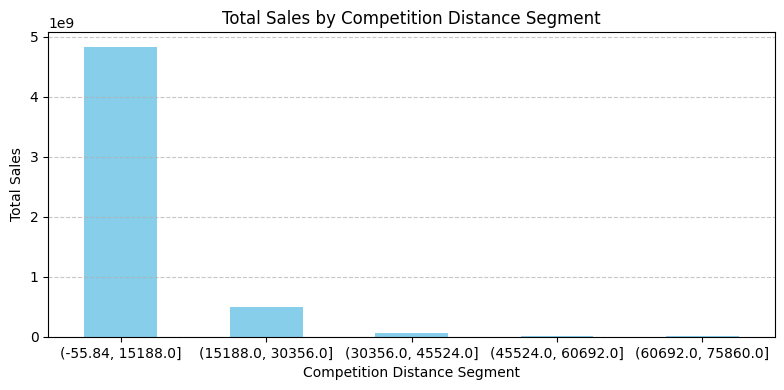

In [112]:
segments = pd.cut(df['CompetitionDistance'], bins=5)

# Group the DataFrame by the segmented 'CompetitionDistance' and calculate total sales
sales_by_segment = df.groupby(segments)['Sales'].sum()

# Plot a bar graph for total sales by segment
plt.figure(figsize=(8, 4))
sales_by_segment.plot(kind='bar', color='skyblue')
plt.title('Total Sales by Competition Distance Segment')
plt.xlabel('Competition Distance Segment')
plt.ylabel('Total Sales')
plt.xticks(rotation=360)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

##### Above graphs shows that the competition distance has sales and customers evenly distributed 

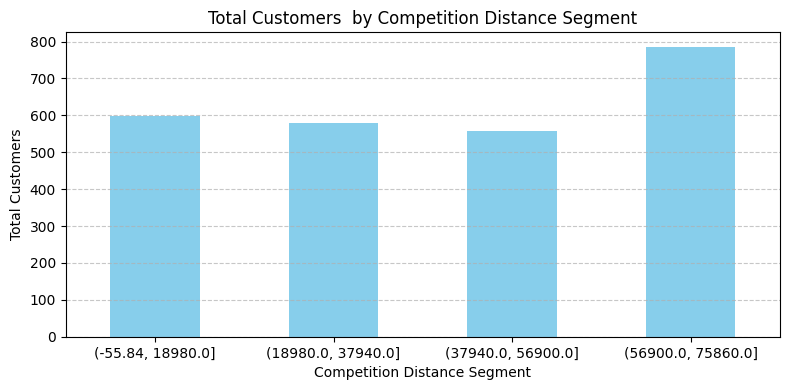

In [113]:
segments = pd.cut(df['CompetitionDistance'], bins=4)

# Group the DataFrame by the segmented 'CompetitionDistance' and calculate total sales
sales_by_segment = df.groupby(segments)['Customers'].mean()

# Plot a bar graph for total sales by segment
plt.figure(figsize=(8, 4))
sales_by_segment.plot(kind='bar', color='skyblue')
plt.title('Total Customers  by Competition Distance Segment')
plt.xlabel('Competition Distance Segment')
plt.ylabel('Total Customers')
plt.xticks(rotation=360)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### Observing Promos

In [114]:
df['Promo'].value_counts()

Promo
0    621619
1    368893
Name: count, dtype: int64

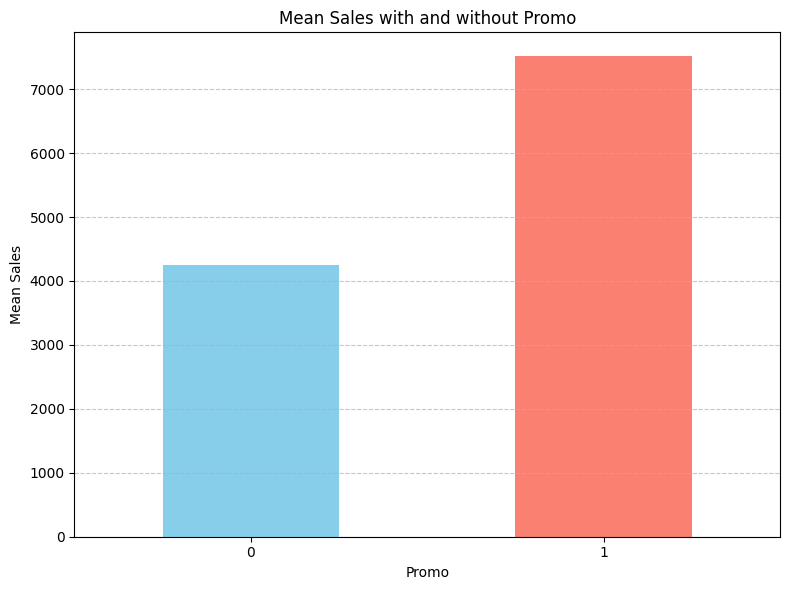

In [115]:
sales_by_promo = df.groupby('Promo')['Sales'].mean()
plt.figure(figsize=(8, 6))
sales_by_promo.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Mean Sales with and without Promo')
plt.xlabel('Promo')
plt.ylabel('Mean Sales')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

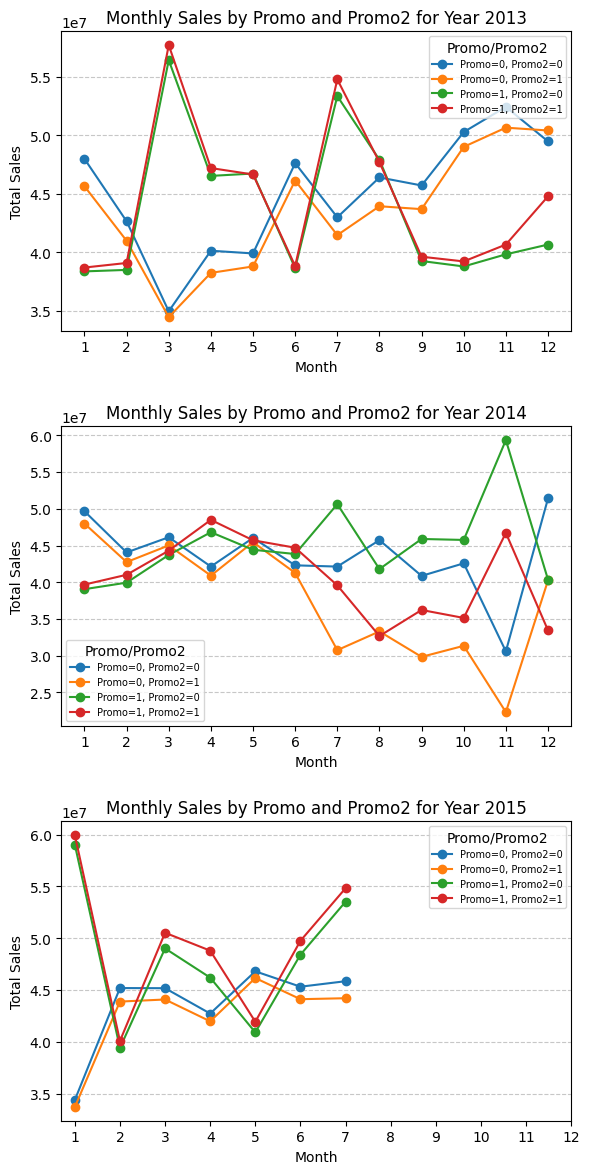

In [116]:
years = [2013, 2014, 2015]

fig, axes = plt.subplots(nrows=len(years), ncols=1, figsize=(6, 4 * len(years)))

for i, year in enumerate(years):
    df_year = df[df['Year'] == year]

    monthly_sales = df_year.groupby(['Month', 'Promo', 'Promo2'])['Sales'].sum().unstack(['Promo', 'Promo2'])
    
    # Plotting on the respective subplot
    monthly_sales.plot(kind='line', ax=axes[i], marker='o')
    axes[i].set_title(f'Monthly Sales by Promo and Promo2 for Year {year}')
    axes[i].set_xlabel('Month')
    axes[i].set_ylabel('Total Sales')
    axes[i].set_xticks(range(1, 13))
    axes[i].legend(title='Promo/Promo2', labels=['Promo=0, Promo2=0', 'Promo=0, Promo2=1', 'Promo=1, Promo2=0', 'Promo=1, Promo2=1'], prop={'size': 7})
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layouta
plt.tight_layout()
plt.show()

### Feature Selection and Encoding

##### Observing Sales

In [117]:
sales0_percent=(df[df['Sales']==0].shape[0])/(df.shape[0]) * 100
print(f'The Overall % of days with no sales for the entire day: {sales0_percent}')

The Overall % of days with no sales for the entire day: 17.452691133474403


In [118]:
len(df.query('Sales == 0 and Open != 0'))
# There are 54 records which has no sales despite not opening the shop

54

In [119]:
df['Open'].value_counts()

Open
1    817695
0    172817
Name: count, dtype: int64

In [120]:
len(df.query('Sales == 0 and Open == 0'))

172817

This clearly indicates that 'Open' doesn't have much importance to the dataset because it among 844391 days a shop is open, the sales is 0 only for 54 occassion. Adding these 54 record might create bias.

In [121]:
df[df.Open != 0]

Store  DayOfWeek       Date  Sales  Customers  Open  Promo  \
0            1          4 2015-07-31   5263        555     1      1   
1            2          4 2015-07-31   6064        625     1      1   
2            3          4 2015-07-31   8314        821     1      1   
3            4          4 2015-07-31  13995       1498     1      1   
4            5          4 2015-07-31   4822        559     1      1   
...        ...        ...        ...    ...        ...   ...    ...   
1016776    682          1 2013-01-01   3375        566     1      0   
1016827    733          1 2013-01-01  10765       2377     1      0   
1016863    769          1 2013-01-01   5035       1248     1      0   
1017042    948          1 2013-01-01   4491       1039     1      0   
1017190   1097          1 2013-01-01   5961       1405     1      0   

         SchoolHoliday  Year  Month  ...  Assortment  CompetitionDistance  \
0                    1  2015      7  ...           a               1270.0   
1                    1  2015      7  ...           a                570.0   
2                    1  2015      7  ...           a              14130.0   
3                    1  2015      7  ...           c                620.0   
4                    1  2015      7  ...           a              29910.0   
...                ...   ...    ...  ...         ...                  ...   
1016776              1  2013      1  ...           a                150.0   
1016827              1  2013      1  ...           b                860.0   
1016863              1  2013      1  ...           b                840.0   
1017042              1  2013      1  ...           b               1430.0   
1017190              1  2013      1  ...           b                720.0   

        CompetitionOpenSinceMonth CompetitionOpenSinceYear Promo2  \
0                             9.0                   2008.0      0   
1                            11.0                   2007.0      1   
2                            12.0                   2006.0      1   
3                             9.0                   2009.0      0   
4                             4.0                   2015.0      0   
...                           ...                      ...    ...   
1016776                       9.0                   2006.0      0   
1016827                      10.0                   1999.0      0   
1016863                       NaN                      NaN      1   
1017042                       NaN                      NaN      0   
1017190                       3.0                   2002.0      0   

         Promo2SinceWeek  Promo2SinceYear    PromoInterval  \
0                    NaN              NaN              NaN   
1                   13.0           2010.0  Jan,Apr,Jul,Oct   
2                   14.0           2011.0  Jan,Apr,Jul,Oct   
3                    NaN              NaN              NaN   
4                    NaN              NaN              NaN   
...                  ...              ...              ...   
1016776              NaN              NaN              NaN   
1016827              NaN              NaN              NaN   
1016863             48.0           2012.0  Jan,Apr,Jul,Oct   
1017042              NaN              NaN              NaN   
1017190              NaN              NaN              NaN   

         Avg_Customer_Sales  Sales_Average  
0                948.288288       9.482883  
1                970.240000       9.702400  
2               1012.667479      10.126675  
3                934.245661       9.342457  
4                862.611807       8.626118  
...                     ...            ...  
1016776          596.289753       5.962898  
1016827          452.881784       4.528818  
1016863          403.445513       4.034455  
1017042          432.242541       4.322425  
1017190          424.270463       4.242705  

[817695 rows x 24 columns]

In [122]:
df_updated = df.copy()

In [123]:
df_updated=df_updated[df_updated.Sales != 0]

In [124]:
df_updated.shape

(817641, 24)

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 990512 entries, 0 to 1017208
Data columns (total 24 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Store                      990512 non-null  int64         
 1   DayOfWeek                  990512 non-null  int32         
 2   Date                       990512 non-null  datetime64[ns]
 3   Sales                      990512 non-null  int64         
 4   Customers                  990512 non-null  int64         
 5   Open                       990512 non-null  int64         
 6   Promo                      990512 non-null  int64         
 7   SchoolHoliday              990512 non-null  int64         
 8   Year                       990512 non-null  int32         
 9   Month                      990512 non-null  int32         
 10  Day                        990512 non-null  int32         
 11  WeekOfYear                 990512 non-null  UInt32      

##### Encoding Store Type and Assortment

In [126]:
df['StoreType'].value_counts()

StoreType
a    535077
d    309038
c    133872
b     12525
Name: count, dtype: int64

In [127]:
df['Assortment'].value_counts()

Assortment
a    527059
c    456016
b      7437
Name: count, dtype: int64

In [128]:
df_2 = df.copy()

##### One Hot Encoding both Store Type and Assortment, the only 2 object features

In [129]:
df_2 = pd.get_dummies(df,columns=['StoreType','Assortment'], dtype=int)

In [130]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 990512 entries, 0 to 1017208
Data columns (total 29 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Store                      990512 non-null  int64         
 1   DayOfWeek                  990512 non-null  int32         
 2   Date                       990512 non-null  datetime64[ns]
 3   Sales                      990512 non-null  int64         
 4   Customers                  990512 non-null  int64         
 5   Open                       990512 non-null  int64         
 6   Promo                      990512 non-null  int64         
 7   SchoolHoliday              990512 non-null  int64         
 8   Year                       990512 non-null  int32         
 9   Month                      990512 non-null  int32         
 10  Day                        990512 non-null  int32         
 11  WeekOfYear                 990512 non-null  UInt32      

In [131]:
df_2.head(2)

Store  DayOfWeek       Date  Sales  Customers  Open  Promo  SchoolHoliday  \
0      1          4 2015-07-31   5263        555     1      1              1   
1      2          4 2015-07-31   6064        625     1      1              1   

   Year  Month  ...    PromoInterval  Avg_Customer_Sales Sales_Average  \
0  2015      7  ...              NaN          948.288288      9.482883   
1  2015      7  ...  Jan,Apr,Jul,Oct          970.240000      9.702400   

   StoreType_a  StoreType_b  StoreType_c  StoreType_d  Assortment_a  \
0            0            0            1            0             1   
1            1            0            0            0             1   

   Assortment_b Assortment_c  
0             0            0  
1             0            0  

[2 rows x 29 columns]

In [132]:
df_2.drop(['StoreType_d'], axis=1, inplace=True)

In [133]:
df_2.drop(['Assortment_c'], axis=1, inplace=True)

In [134]:
df_2.head()

Store  DayOfWeek       Date  Sales  Customers  Open  Promo  SchoolHoliday  \
0      1          4 2015-07-31   5263        555     1      1              1   
1      2          4 2015-07-31   6064        625     1      1              1   
2      3          4 2015-07-31   8314        821     1      1              1   
3      4          4 2015-07-31  13995       1498     1      1              1   
4      5          4 2015-07-31   4822        559     1      1              1   

   Year  Month  ...  Promo2SinceWeek  Promo2SinceYear    PromoInterval  \
0  2015      7  ...              NaN              NaN              NaN   
1  2015      7  ...             13.0           2010.0  Jan,Apr,Jul,Oct   
2  2015      7  ...             14.0           2011.0  Jan,Apr,Jul,Oct   
3  2015      7  ...              NaN              NaN              NaN   
4  2015      7  ...              NaN              NaN              NaN   

   Avg_Customer_Sales  Sales_Average  StoreType_a  StoreType_b  StoreType_c  \
0          948.288288       9.482883            0            0            1   
1          970.240000       9.702400            1            0            0   
2         1012.667479      10.126675            1            0            0   
3          934.245661       9.342457            0            0            1   
4          862.611807       8.626118            1            0            0   

   Assortment_a Assortment_b  
0             1            0  
1             1            0  
2             1            0  
3             0            0  
4             1            0  

[5 rows x 27 columns]

In [135]:
# Replicating the same for df_updated (Copied dataframe which dropped all sales values with 0)
df_updated = pd.get_dummies(df_updated,columns=['StoreType','Assortment'], dtype=int)
df_updated.drop(['StoreType_d'], axis=1, inplace=True)
df_updated.drop(['Assortment_c'], axis=1, inplace=True)
df_updated.head()

Store  DayOfWeek       Date  Sales  Customers  Open  Promo  SchoolHoliday  \
0      1          4 2015-07-31   5263        555     1      1              1   
1      2          4 2015-07-31   6064        625     1      1              1   
2      3          4 2015-07-31   8314        821     1      1              1   
3      4          4 2015-07-31  13995       1498     1      1              1   
4      5          4 2015-07-31   4822        559     1      1              1   

   Year  Month  ...  Promo2SinceWeek  Promo2SinceYear    PromoInterval  \
0  2015      7  ...              NaN              NaN              NaN   
1  2015      7  ...             13.0           2010.0  Jan,Apr,Jul,Oct   
2  2015      7  ...             14.0           2011.0  Jan,Apr,Jul,Oct   
3  2015      7  ...              NaN              NaN              NaN   
4  2015      7  ...              NaN              NaN              NaN   

   Avg_Customer_Sales  Sales_Average  StoreType_a  StoreType_b  StoreType_c  \
0          948.288288       9.482883            0            0            1   
1          970.240000       9.702400            1            0            0   
2         1012.667479      10.126675            1            0            0   
3          934.245661       9.342457            0            0            1   
4          862.611807       8.626118            1            0            0   

   Assortment_a Assortment_b  
0             1            0  
1             1            0  
2             1            0  
3             0            0  
4             1            0  

[5 rows x 27 columns]

### Conclusions made from EDA:

#### 
The sales trend over time is constant across its entire time period#### 

The number of customers increases the number of sale#### s

overall sales decreases over the years (Even considering 2015 has only till July e#### nd)

Typical sales are higher between March and July and plummets between August and Dec#### ember

Sales are not impacted by school Holidays and State Holidays and uniformly distributed after being s
#### 
Stores:

More than half of the record stores e e f#### rom Store:A

Store Type 'B' has not only less stores among other stores but also the only store type to use 'extra' segm#### ent products.

Store 'B' has average sals#### tomers


Promos:
The sales increases almost double 
w#### en there is a promo

The Promos####  are keep at weekdays

Promo, Promo2 in particular doesn't seem to have any impactover the overall 'Promo'


### Split and Model Creation

In [136]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import math
from math import sqrt
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import LassoLars
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 990512 entries, 0 to 1017208
Data columns (total 24 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Store                      990512 non-null  int64         
 1   DayOfWeek                  990512 non-null  int32         
 2   Date                       990512 non-null  datetime64[ns]
 3   Sales                      990512 non-null  int64         
 4   Customers                  990512 non-null  int64         
 5   Open                       990512 non-null  int64         
 6   Promo                      990512 non-null  int64         
 7   SchoolHoliday              990512 non-null  int64         
 8   Year                       990512 non-null  int32         
 9   Month                      990512 non-null  int32         
 10  Day                        990512 non-null  int32         
 11  WeekOfYear                 990512 non-null  UInt32      

In [138]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 990512 entries, 0 to 1017208
Data columns (total 27 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Store                      990512 non-null  int64         
 1   DayOfWeek                  990512 non-null  int32         
 2   Date                       990512 non-null  datetime64[ns]
 3   Sales                      990512 non-null  int64         
 4   Customers                  990512 non-null  int64         
 5   Open                       990512 non-null  int64         
 6   Promo                      990512 non-null  int64         
 7   SchoolHoliday              990512 non-null  int64         
 8   Year                       990512 non-null  int32         
 9   Month                      990512 non-null  int32         
 10  Day                        990512 non-null  int32         
 11  WeekOfYear                 990512 non-null  UInt32      

In [139]:
df_updated.info()

<class 'pandas.core.frame.DataFrame'>
Index: 817641 entries, 0 to 1017190
Data columns (total 27 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Store                      817641 non-null  int64         
 1   DayOfWeek                  817641 non-null  int32         
 2   Date                       817641 non-null  datetime64[ns]
 3   Sales                      817641 non-null  int64         
 4   Customers                  817641 non-null  int64         
 5   Open                       817641 non-null  int64         
 6   Promo                      817641 non-null  int64         
 7   SchoolHoliday              817641 non-null  int64         
 8   Year                       817641 non-null  int32         
 9   Month                      817641 non-null  int32         
 10  Day                        817641 non-null  int32         
 11  WeekOfYear                 817641 non-null  UInt32      

In [140]:
df_updated.info()

<class 'pandas.core.frame.DataFrame'>
Index: 817641 entries, 0 to 1017190
Data columns (total 27 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Store                      817641 non-null  int64         
 1   DayOfWeek                  817641 non-null  int32         
 2   Date                       817641 non-null  datetime64[ns]
 3   Sales                      817641 non-null  int64         
 4   Customers                  817641 non-null  int64         
 5   Open                       817641 non-null  int64         
 6   Promo                      817641 non-null  int64         
 7   SchoolHoliday              817641 non-null  int64         
 8   Year                       817641 non-null  int32         
 9   Month                      817641 non-null  int32         
 10  Day                        817641 non-null  int32         
 11  WeekOfYear                 817641 non-null  UInt32      

In [141]:
df_3=df_updated.copy()

In [142]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 817641 entries, 0 to 1017190
Data columns (total 27 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Store                      817641 non-null  int64         
 1   DayOfWeek                  817641 non-null  int32         
 2   Date                       817641 non-null  datetime64[ns]
 3   Sales                      817641 non-null  int64         
 4   Customers                  817641 non-null  int64         
 5   Open                       817641 non-null  int64         
 6   Promo                      817641 non-null  int64         
 7   SchoolHoliday              817641 non-null  int64         
 8   Year                       817641 non-null  int32         
 9   Month                      817641 non-null  int32         
 10  Day                        817641 non-null  int32         
 11  WeekOfYear                 817641 non-null  UInt32      

In [143]:
df_3 = df_3.drop(['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear','Promo2SinceWeek',
                     'Promo2SinceYear', 'PromoInterval'], axis=1)

In [144]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 817641 entries, 0 to 1017190
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Store                817641 non-null  int64         
 1   DayOfWeek            817641 non-null  int32         
 2   Date                 817641 non-null  datetime64[ns]
 3   Sales                817641 non-null  int64         
 4   Customers            817641 non-null  int64         
 5   Open                 817641 non-null  int64         
 6   Promo                817641 non-null  int64         
 7   SchoolHoliday        817641 non-null  int64         
 8   Year                 817641 non-null  int32         
 9   Month                817641 non-null  int32         
 10  Day                  817641 non-null  int32         
 11  WeekOfYear           817641 non-null  UInt32        
 12  DayOfWeekName        817641 non-null  object        
 13  CompetitionDistanc

### Feature Selection - Variance Inflation Factor (VIF)

In [145]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [146]:
df_vif = df_3.drop(['Sales','Date','CompetitionDistance','Sales_Average','WeekOfYear','Avg_Customer_Sales','DayOfWeekName'] , axis = 1)

In [147]:
df_vif.info()

<class 'pandas.core.frame.DataFrame'>
Index: 817641 entries, 0 to 1017190
Data columns (total 15 columns):
 #   Column         Non-Null Count   Dtype
---  ------         --------------   -----
 0   Store          817641 non-null  int64
 1   DayOfWeek      817641 non-null  int32
 2   Customers      817641 non-null  int64
 3   Open           817641 non-null  int64
 4   Promo          817641 non-null  int64
 5   SchoolHoliday  817641 non-null  int64
 6   Year           817641 non-null  int32
 7   Month          817641 non-null  int32
 8   Day            817641 non-null  int32
 9   Promo2         817641 non-null  int64
 10  StoreType_a    817641 non-null  int32
 11  StoreType_b    817641 non-null  int32
 12  StoreType_c    817641 non-null  int32
 13  Assortment_a   817641 non-null  int32
 14  Assortment_b   817641 non-null  int32
dtypes: int32(9), int64(6)
memory usage: 71.7 MB


In [148]:
vif_data = pd.DataFrame()
vif_data["feature"] = df_vif.columns
vif_data

feature
0           Store
1       DayOfWeek
2       Customers
3            Open
4           Promo
5   SchoolHoliday
6            Year
7           Month
8             Day
9          Promo2
10    StoreType_a
11    StoreType_b
12    StoreType_c
13   Assortment_a
14   Assortment_b

### It's adviced to remove the features which have VIF > 5. In this case: Open can be removed for model building

In [149]:
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df_vif.values, i)
                          for i in range(len(df_vif.columns))]

print(vif_data)

          feature           VIF
0           Store  1.006336e+00
1       DayOfWeek  1.112713e+00
2       Customers  1.412920e+00
3            Open  7.232988e+06
4           Promo  1.150046e+00
5   SchoolHoliday  1.036243e+00
6            Year  1.078067e+00
7           Month  1.094656e+00
8             Day  1.019094e+00
9          Promo2  1.048155e+00
10    StoreType_a  1.431115e+00
11    StoreType_b  2.683188e+00
12    StoreType_c  1.320480e+00
13   Assortment_a  1.081348e+00
14   Assortment_b  2.554377e+00


In [150]:
df_3.isnull().sum()

Store                  0
DayOfWeek              0
Date                   0
Sales                  0
Customers              0
Open                   0
Promo                  0
SchoolHoliday          0
Year                   0
Month                  0
Day                    0
WeekOfYear             0
DayOfWeekName          0
CompetitionDistance    0
Promo2                 0
Avg_Customer_Sales     0
Sales_Average          0
StoreType_a            0
StoreType_b            0
StoreType_c            0
Assortment_a           0
Assortment_b           0
dtype: int64

In [151]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 817641 entries, 0 to 1017190
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Store                817641 non-null  int64         
 1   DayOfWeek            817641 non-null  int32         
 2   Date                 817641 non-null  datetime64[ns]
 3   Sales                817641 non-null  int64         
 4   Customers            817641 non-null  int64         
 5   Open                 817641 non-null  int64         
 6   Promo                817641 non-null  int64         
 7   SchoolHoliday        817641 non-null  int64         
 8   Year                 817641 non-null  int32         
 9   Month                817641 non-null  int32         
 10  Day                  817641 non-null  int32         
 11  WeekOfYear           817641 non-null  UInt32        
 12  DayOfWeekName        817641 non-null  object        
 13  CompetitionDistanc

### Train Test Split and Model Building

In [152]:
X = df_3.drop(['Sales','Store','Date','Year','Open','WeekOfYear','DayOfWeekName'] , axis = 1)
Y= df_3.Sales

In [153]:
X.shape

(817641, 15)

In [154]:
Y.shape

(817641,)

In [155]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3, random_state=0)

In [156]:
columns=X_train.columns

### Transforming Data

In [157]:
scaler = MinMaxScaler()

In [158]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Linear Regression

In [159]:
lreg = LinearRegression()
lreg.fit(X_train, y_train)

LinearRegression()

In [160]:
print(lreg.intercept_)
print(lreg.coef_)

-3574.9827331339957
[-7.19455539e+01  3.44578028e+04  2.17297956e+02  1.33775212e+01
  6.75169141e+01  5.21601608e+00  2.02672216e+02 -1.18625279e+02
  1.56927821e+04  1.56927821e+04  1.64661943e+02 -1.39662910e+03
  1.39490258e+02 -6.37826016e+01 -3.52608606e+03]


In [161]:
# prediction

y_test_pred=lreg.predict(X_test)

y_train_pred=lreg.predict(X_train)

In [162]:
mean_squared_error(y_test, y_test_pred)

369232.5561426917

In [163]:
# Test performance
math.sqrt(mean_squared_error(y_test, y_test_pred))

607.6450906102111

In [164]:
from sklearn.metrics import r2_score, mean_squared_error

In [165]:
#Calculating the metric for training and testing dataset

print(r2_score(y_train,y_train_pred))

0.9382932985224681


In [166]:
#Calculating the metric for training and testing dataset for r2 score

print(r2_score(y_test,y_test_pred))

0.9393870270207507


In [167]:
X_test.shape

(245293, 15)

In [168]:
n=X_test.shape[0]
k=X_test.shape[1]
x=r2_score(y_test,y_test_pred)

In [169]:
# Adjusted R-Square

adj_r2=1-((1-x)*(n-1)/(n-k-1))
print(adj_r2)

0.9393833202133669


### Root Mean Square Error (RMSE) to evaluate the performance of a regression model. 
##### sqrt(mean(train (test) ,train_pred(test_pred)) where train is the actual value and train_pred is the predicted value  

In [170]:
sqrt(mean_squared_error(y_train, y_train_pred))

613.1244379098937

In [171]:
sqrt(mean_squared_error(y_test, y_test_pred))

607.6450906102111

###### Train RMSE Score: 613.12 | Test RMSE Score: 607.64

#### Mean Absolute Percentage Error (MAPE) to measure the prediction accuracy in a regression model.
##### n (np.mean - mean, np.abs absolute value) here is the number of observations, y_train (or y_test) is the actual value, and y_predicted (or y_test_predicted) is the predicted value

In [172]:
np.mean(np.abs((y_train - y_train_pred) / y_train_pred)) * 100

9.47632148770511

In [173]:
np.mean(np.abs((y_test - y_test_pred) / y_test_pred)) * 100

7.965006738924893

###### Train MAPE Score: 9.47 | Test MAPE Score: 7.96

In [174]:
intercept=lreg.intercept_
coefficient=lreg.coef_

In [175]:
intercept

-3574.9827331339957

In [176]:
coefficient

array([-7.19455539e+01,  3.44578028e+04,  2.17297956e+02,  1.33775212e+01,
        6.75169141e+01,  5.21601608e+00,  2.02672216e+02, -1.18625279e+02,
        1.56927821e+04,  1.56927821e+04,  1.64661943e+02, -1.39662910e+03,
        1.39490258e+02, -6.37826016e+01, -3.52608606e+03])

In [177]:
lreg.coef_

array([-7.19455539e+01,  3.44578028e+04,  2.17297956e+02,  1.33775212e+01,
        6.75169141e+01,  5.21601608e+00,  2.02672216e+02, -1.18625279e+02,
        1.56927821e+04,  1.56927821e+04,  1.64661943e+02, -1.39662910e+03,
        1.39490258e+02, -6.37826016e+01, -3.52608606e+03])

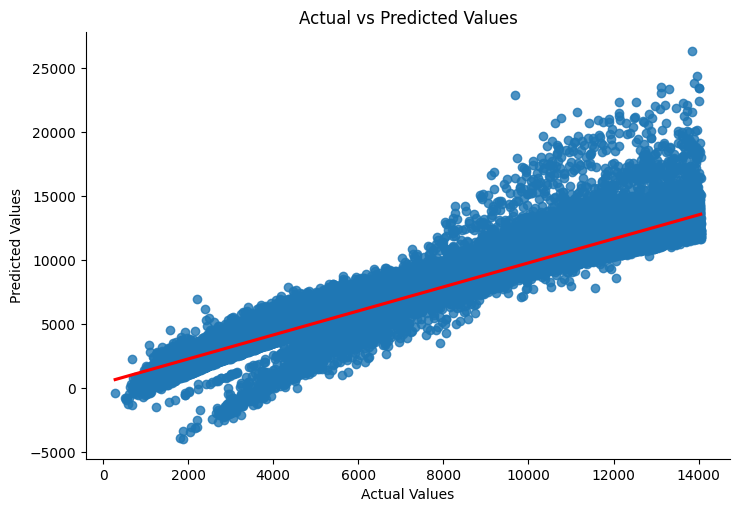

In [178]:
predicted_Y = intercept + np.dot(X_test, coefficient)

# Create a DataFrame
data = pd.DataFrame({'Actual': y_test, 'Predicted': predicted_Y})

# Plot using sns.lmplot
sns.lmplot(x='Actual', y='Predicted', data=data, line_kws={'color': 'red'}, aspect=1.5)
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

### R-Square: 0.939387

### Adjusted R-Square: 0.939383

### <b> Lasso Regression </b>

In [179]:
lasso = LassoLars(alpha=0.3, fit_intercept=False)
lasso_reg = lasso.fit(X_train, y_train)

In [180]:
train_score_2=lasso_reg.score(X_train, y_train)
test_score_2=lasso_reg.score(X_test, y_test)

In [181]:
#print("Regresion Model Score" , ":" , train_score_2 , "," ,"Out of Sample Test Score" ,":" , test_score_2)
print(train_score_2)

0.8050783444471601


In [182]:
print(test_score_2)

0.8044888999133396


##### Train Score: 0.805 | Test Score: 0.804

In [183]:
y_predicted = lasso_reg.predict(X_train)
y_test_predicted = lasso_reg.predict(X_test)

In [184]:
n=X_test.shape[0]
k=X_test.shape[1]
x=r2_score(y_test,y_test_predicted)

In [185]:
# Adjusted R-Square

adj_r2=1-((1-x)*(n-1)/(n-k-1))
print(adj_r2)

0.8044769433642083


##### Training RMSE

In [186]:
sqrt(mean_squared_error(y_train, y_predicted))

1089.7139393539521

##### Testing RMSE

In [187]:
sqrt(mean_squared_error(y_test, y_test_predicted))

1091.3219995970478

##### Train RMSE Score: 1089.71 | Test RMSE Score: 1091.32

##### MAPE Score: Training

In [188]:
np.mean(np.abs((y_train - y_predicted) / y_train)) * 100

12.948255713030662

In [189]:
np.mean(np.abs((y_test - y_test_predicted) / y_test)) * 100

12.929661343478912

##### Train MAPE Score: 12.94 | Test MAPE Score: 12.92

### Decision Tree

In [190]:
tree = DecisionTreeRegressor()
tree_reg = tree.fit(X_train, y_train)

In [191]:
train_score_dt=tree_reg.score(X_train, y_train)
test_score_dt=tree_reg.score(X_test, y_test)

In [192]:
train_score_dt

1.0

In [193]:
test_score_dt

0.9999131339799266

##### Train Score: 1.0 | Test Score: 0.999

In [194]:
y_predicted = tree_reg.predict(X_train)
y_test_predicted = tree_reg.predict(X_test)

In [195]:
n=X_test.shape[0]
k=X_test.shape[1]
x=r2_score(y_test,y_test_predicted)

In [196]:
# Adjusted R-Square

adj_r2=1-((1-x)*(n-1)/(n-k-1))
print(adj_r2)

0.9999131286676051


In [197]:
sqrt(mean_squared_error(y_train, y_predicted))

0.0

In [198]:
sqrt(mean_squared_error(y_test, y_test_predicted))

23.003406941797753

##### Train RMSE Score: 0.0 | Test RMSE Score: 0.23

In [199]:
np.mean(np.abs((y_train - y_predicted) / y_train)) * 100

0.0

In [200]:
np.mean(np.abs((y_test - y_test_predicted) / y_test)) * 100

0.18137636650905237

##### Train MAPE Score: 0.0 | Test MAPE Score: 0.18

#####  Above model shows clear signs of overfitting (perfect score on training data).

### Decision Tree with Hyper Param Tuning

In [201]:
tree = DecisionTreeRegressor()

# Define the hyperparameters and their possible values
params = {
    'min_samples_split': [2, 3, 5, 7],
    'min_samples_leaf': [6, 8, 10],
}

grid = RandomizedSearchCV(estimator=tree, param_distributions=params, verbose=True, cv=10)

grid.fit(X_train, y_train)

# Get the best parameters
print(grid.best_params_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
{'min_samples_split': 7, 'min_samples_leaf': 6}


In [202]:
dec_tree = DecisionTreeRegressor(min_samples_leaf=6,min_samples_split=5)
tree_reg = dec_tree.fit(X_train, y_train)

In [203]:
train_score_dt=tree_reg.score(X_train, y_train)
test_score_dt=tree_reg.score(X_test, y_test)

In [204]:
train_score_dt

0.9999189296209107

In [205]:
test_score_dt

0.9998652902394141

##### Train Score: 0.99 | Test Score: 0.99

In [206]:
y_predicted = tree_reg.predict(X_train)
y_test_predicted = tree_reg.predict(X_test)

In [207]:
n=X_test.shape[0]
k=X_test.shape[1]
x=r2_score(y_test,y_test_predicted)

In [208]:
# Adjusted R-Square

adj_r2=1-((1-x)*(n-1)/(n-k-1))
print(adj_r2)

0.999865282001192


In [209]:
sqrt(mean_squared_error(y_train, y_predicted))

22.223556549597486

In [210]:
sqrt(mean_squared_error(y_test, y_test_predicted))

28.646181057398756

##### Train RMSE Score: 22.22 | Test RMSE Score: 28.51

In [211]:
np.mean(np.abs((y_train - y_predicted) / y_train)) * 100

0.1439377126707763

In [212]:
np.mean(np.abs((y_test - y_test_predicted) / y_test)) * 100

0.21693852021098248

##### Train MAPE Score: 0.14 | Test MAPE Score: 0.21

##### This model performs well and addresses some overfitting issues seen in Decision Tree without hyper param tuning, though it still performs very well on both training and testing sets.

### Random Forest - With Hyper Param Tuning

### As per the Hyper Param Tuning, we receive the below paramters for Random Forest

Fitting 10 folds for each of 10 candidates, totalling 100 fits
{'n_estimators': 40,
 'min_samples_split': 6,
 'min_samples_leaf': 1,
 'max_depth': 30}

In [213]:
#rfr=RandomForestRegressor(n_jobs=-1)

#params = {
#    'n_estimators':[40,50,60,70,80,90],
#    'min_samples_split':[2,3,6,8],
#    'min_samples_leaf':[1,2,3,4],
#    'max_depth':[None,5,15,30]
#         }
#grid = RandomizedSearchCV(estimator=rfr,param_distributions=params,verbose=True,cv=10)

#grid.fit(X_train, y_train)
#grid.best_params_

In [214]:
#%%time
ran_for_h = RandomForestRegressor(n_estimators=40,min_samples_split=6, min_samples_leaf=1,max_depth=30,n_jobs=-1)
rdfreg = ran_for_h.fit(X_train, y_train)

In [215]:
train_score_rf_h=rdfreg.score(X_train, y_train)
test_score_rf_h=rdfreg.score(X_test, y_test)

In [216]:
train_score_rf_h

0.9999881822481248

In [217]:
test_score_rf_h

0.9999825673523814

##### Train Score: 0.99 | Test Score: 0.93

In [218]:
y_predicted_rf_h = rdfreg.predict(X_train)
y_test_predicted_rf_h = rdfreg.predict(X_test)

In [219]:
sqrt(mean_squared_error(y_train, y_predicted_rf_h))

8.484961856004828

In [220]:
sqrt(mean_squared_error(y_test, y_test_predicted_rf_h))

10.305020881295865

##### Train RMSE Score: 7.76 | Test Score: 10.21

In [221]:
np.mean(np.abs((y_train - y_predicted_rf_h) / y_train)) * 100

0.03946880315905993

In [222]:
np.mean(np.abs((y_test - y_test_predicted_rf_h) / y_test)) * 100

0.06747909332497298

##### Train MAPE Score: 0.04 | Test MAPE Score: 0.067

##### This model has strong performance with a good balance between training and testing scores, indicating low overfitting.

### K Nearest Neighbour

In [223]:
from sklearn.neighbors import KNeighborsRegressor

In [224]:
knn = KNeighborsRegressor(n_neighbors = 30)
knn_reg = knn.fit(X_train, y_train)

In [225]:
knn_reg.score(X_train, y_train)

0.7967566694620052

In [226]:
knn_reg.score(X_test, y_test)

0.7786705500281502

### Train Score: 0.79 | Test Score: 0.78

In [227]:
y_predicted_knn = knn_reg.predict(X_train)
y_test_predicted_knn = knn_reg.predict(X_test)

In [228]:
n=X_test.shape[0]
k=X_test.shape[1]
x=r2_score(y_test,y_test_predicted_knn)

In [229]:
# Adjusted R-Square

adj_r2=1-((1-x)*(n-1)/(n-k-1))
print(adj_r2)

0.7786570145488775


In [230]:
sqrt(mean_squared_error(y_train, y_predicted_knn))

1112.7320883285875

In [231]:
sqrt(mean_squared_error(y_test, y_test_predicted_knn))

1161.1459260759652

### RMSE Train Score: 1112.73 | RMSE Test Score: 1161.14

In [232]:
np.mean(np.abs((y_train - y_predicted_knn) / y_train)) * 100

13.73526365022904

In [233]:
np.mean(np.abs((y_test - y_test_predicted_knn) / y_test)) * 100

14.3517757947157

### Train MAPE Score: 13.73 | Test MAPE Score: 14.35

##### The above KNN model performs doesn't perform better than any models performed before

### Decision Tree with df_2 Dataset

In [234]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 990512 entries, 0 to 1017208
Data columns (total 27 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Store                      990512 non-null  int64         
 1   DayOfWeek                  990512 non-null  int32         
 2   Date                       990512 non-null  datetime64[ns]
 3   Sales                      990512 non-null  int64         
 4   Customers                  990512 non-null  int64         
 5   Open                       990512 non-null  int64         
 6   Promo                      990512 non-null  int64         
 7   SchoolHoliday              990512 non-null  int64         
 8   Year                       990512 non-null  int32         
 9   Month                      990512 non-null  int32         
 10  Day                        990512 non-null  int32         
 11  WeekOfYear                 990512 non-null  UInt32      

In [235]:
X = df_2.drop(['Sales','Store','Date','Year','Open','WeekOfYear','DayOfWeekName','CompetitionDistance','CompetitionOpenSinceMonth','CompetitionOpenSinceYear','Promo2SinceYear','Avg_Customer_Sales','Sales_Average','PromoInterval'] , axis = 1)
Y= df_2.Sales

In [236]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3, random_state=0)

In [237]:
# Transforming data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [238]:
dt_df_2 = DecisionTreeRegressor(min_samples_leaf=5,min_samples_split=2)
tree_reg = dt_df_2.fit(X_train, y_train)

In [239]:
tree_reg.feature_importances_

array([8.29384297e-03, 8.98371110e-01, 2.47710588e-02, 8.34181914e-04,
       6.85422891e-03, 8.38177022e-03, 6.49369404e-04, 1.60488760e-02,
       1.32094232e-02, 2.11612665e-03, 1.04762036e-02, 4.35364883e-03,
       5.64015937e-03])

In [240]:
X

DayOfWeek  Customers  Promo  SchoolHoliday  Month  Day  Promo2  \
0                4        555      1              1      7   31       0   
1                4        625      1              1      7   31       1   
2                4        821      1              1      7   31       1   
3                4       1498      1              1      7   31       0   
4                4        559      1              1      7   31       0   
...            ...        ...    ...            ...    ...  ...     ...   
1017204          1          0      0              1      1    1       1   
1017205          1          0      0              1      1    1       0   
1017206          1          0      0              1      1    1       0   
1017207          1          0      0              1      1    1       0   
1017208          1          0      0              1      1    1       1   

         Promo2SinceWeek  StoreType_a  StoreType_b  StoreType_c  Assortment_a  \
0                    NaN            0            0            1             1   
1                   13.0            1            0            0             1   
2                   14.0            1            0            0             1   
3                    NaN            0            0            1             0   
4                    NaN            1            0            0             1   
...                  ...          ...          ...          ...           ...   
1017204             31.0            1            0            0             1   
1017205              NaN            0            0            1             0   
1017206              NaN            1            0            0             0   
1017207              NaN            1            0            0             0   
1017208             22.0            0            0            0             0   

         Assortment_b  
0                   0  
1                   0  
2                   0  
3                   0  
4                   0  
...               ...  
1017204             0  
1017205             0  
1017206             0  
1017207             0  
1017208             0  

[990512 rows x 13 columns]

In [241]:
train_score_dt=tree_reg.score(X_train, y_train)
test_score_dt=tree_reg.score(X_test, y_test)

In [242]:
train_score_dt

0.9616896137966121

In [243]:
test_score_dt

0.9160631647603111

### Train Score: 0.96 | Test Score: 0.91

In [244]:
y_predicted = tree_reg.predict(X_train)
y_test_predicted = tree_reg.predict(X_test)

In [245]:
n=X_test.shape[0]
k=X_test.shape[1]
x=r2_score(y_test,y_test_predicted)

In [246]:
# Adjusted R-Square

adj_r2=1-((1-x)*(n-1)/(n-k-1))
print(adj_r2)

0.9160594924884591


In [247]:
sqrt(mean_squared_error(y_train, y_predicted))

659.4636096512467

In [248]:
sqrt(mean_squared_error(y_test, y_test_predicted))

975.0786010193395

##### RMSE Train Score: 659.4 | RMSE Test Score: 975.91

In [249]:
np.mean(np.abs((y_train - y_predicted) / y_train)) * 100

8.38420154762045

In [250]:
np.mean(np.abs((y_test - y_test_predicted) / y_test)) * 100

12.549634455442977

##### Train MAPE Score: 8.38 | Test MAPE Score: 12.54

##### The above df_2 Decision Tree model shows less overfitting compared to Model 3 and 4, but it still has a relatively high RMSE on the test set.

### Feature Selection

In [251]:
X = df_2.drop(['Sales','Store','Date','Year','Open','WeekOfYear','DayOfWeekName','CompetitionDistance','CompetitionOpenSinceMonth','CompetitionOpenSinceYear','Promo2SinceYear','Avg_Customer_Sales','Sales_Average','PromoInterval'] , axis = 1)
Y= df_2.Sales

In [252]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3, random_state=0)

In [253]:
dt_df_fs = DecisionTreeRegressor(min_samples_leaf=5,min_samples_split=2)
tree_reg = dt_df_fs.fit(X_train, y_train)

In [254]:
#Customers is the most influential feature, dominating the model's predictions.
#Promo and Promo2SinceWeek also play a role but are much less important compared to the number of customers.
#Store type and assortment type features have some impact but are generally less influential.
#Day and month related features contribute marginally.
#SchoolHoliday and Promo2 are the least important, suggesting they might be less relevant for the prediction task.

In [255]:
df_feature_importances = pd.DataFrame(index=X.columns, data=tree_reg.feature_importances_, columns=['Feature impor'])
print(df_feature_importances)

                 Feature impor
DayOfWeek             0.008283
Customers             0.898350
Promo                 0.024771
SchoolHoliday         0.000820
Month                 0.006881
Day                   0.008417
Promo2                0.000555
Promo2SinceWeek       0.016133
StoreType_a           0.013226
StoreType_b           0.002708
StoreType_c           0.010456
Assortment_a          0.004355
Assortment_b          0.005045


### Random Forest Regression

In [256]:
#%%time
ran_for_df_2 = RandomForestRegressor(n_estimators=40,min_samples_split=6, min_samples_leaf=1,max_depth=30,n_jobs=-1)
rdfreg = ran_for_df_2.fit(X_train, y_train)

In [257]:
train_score_rf=rdfreg.score(X_train, y_train)
test_score_rf=rdfreg.score(X_test, y_test)

In [258]:
train_score_rf

0.9772293818788326

In [259]:
test_score_rf

0.9323942064640514

##### Train Score: 0.97 | Test Score: 0.93

In [260]:
y_predicted_rf = rdfreg.predict(X_train)
y_test_predicted_rf = rdfreg.predict(X_test)

In [261]:
n=X_test.shape[0]
k=X_test.shape[1]
x=r2_score(y_test,y_test_predicted_rf)

In [262]:
# Adjusted R-Square

adj_r2=1-((1-x)*(n-1)/(n-k-1))
print(adj_r2)

0.932391248682144


In [263]:
sqrt(mean_squared_error(y_train, y_predicted_rf))

508.41690244204636

In [264]:
sqrt(mean_squared_error(y_test, y_test_predicted_rf))

875.095171779693

##### RMSE Train score: 508.21 | RMSE Test Score: 874.99

In [265]:
np.mean(np.abs((y_train - y_predicted_rf) / y_train)) * 100

inf

In [266]:
np.mean(np.abs((y_test - y_test_predicted_rf) / y_test)) * 100

11.362958674841012

##### Train MAPE Score: Inf | Test MAPE Score: 11.36

##### The above df_2 Random Forest model has high train and test scores, indicating good performance, but the infinite train MAPE score indicates some issue with the data or model.

### KNN for DF_2 Dataset

In [267]:
X = df_2.drop(['Sales','Store','Date','Year','Open','WeekOfYear','DayOfWeekName','CompetitionDistance','CompetitionOpenSinceMonth','CompetitionOpenSinceYear','Promo2SinceYear','Avg_Customer_Sales','Sales_Average','PromoInterval','Promo2SinceWeek'] , axis = 1)
Y= df_2.Sales

In [268]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3, random_state=0)

In [269]:
knn = KNeighborsRegressor(n_neighbors = 30)
knn_reg = knn.fit(X_train, y_train)

In [270]:
knn_reg.score(X_train, y_train)

0.8873141662251091

In [271]:
knn_reg.score(X_test, y_test)

0.8790373111258262

### Train Score: 0.887 | Test Score: 0.879

In [272]:
y_predicted_knn = knn_reg.predict(X_train)
y_test_predicted_knn = knn_reg.predict(X_test)

In [273]:
n=X_test.shape[0]
k=X_test.shape[1]
x=r2_score(y_test,y_test_predicted_knn)

In [274]:
# Adjusted R-Square

adj_r2=1-((1-x)*(n-1)/(n-k-1))
print(adj_r2)

0.8790324260636284


In [275]:
sqrt(mean_squared_error(y_train, y_predicted_knn))

1131.0120489400442

In [276]:
sqrt(mean_squared_error(y_test, y_test_predicted_knn))

1170.5475124853767

##### Train RMSE Score: 1131.01 | Test RMSE Score: 1170.54

In [277]:
np.mean(np.abs((y_train - y_predicted_knn) / y_train)) * 100

15.379007201765859

In [278]:
np.mean(np.abs((y_test - y_test_predicted_knn) / y_test)) * 100

15.897572480685856

##### Train MAPE Score: 15.37 | Test MAPE Score: 15.89

##### The above df_2 KNN model performs better than KNN with df_2 but still not as well as other models.

### <b> Final Result: </b>

### Model 1 (Linear Regression): 
###### R-Square: 0.93
###### Adjusted R-Square: 0.93

### Model 2 (Lasso):
###### Lasso Regression Train Score: 0.805
###### Lasso Regression Test Score: 0.804
###### Lasso RMSE Train Score: 1089.71
###### Lasso RMSE Test score: 1091.32
###### Lasso MAPE Train Score: 12.95
###### Lasso MAPE Test Score: 12.93

### Model 3 (Decision Tree):

###### Decision Tree Train Score: 1
###### Decision Tree Test Score: 0.99
###### Train RMSE Score: 0.0
###### Test RMSE: 0.23
###### Train MAPE Score: 0.0
###### Test MAPE Score: 0.18

### Model 4 (Decision Tree with Hyper Param Tuning):

###### Decision Tree Train Score: 0.99
###### Decision Tree Test Score: 0.99
###### Train RMSE Score: 22.22
###### Test RMSE: 28.518
###### Train MAPE Score: 0.14
###### Test MAPE Score: 0.21

### Model 5 (Random Forest): Winner

###### Random Forest Train Score: 0.99
###### Random Forest Test Score: 0.93
###### Random Forest Train RMSE: 7.76
###### Random Forest Test RMSE: 10.21
###### Random Forest Train MAPE Score: 0.04
###### Random Forest Test MAPE Score: 0.067

### Model 6 (K-Nearest Neighbours):

###### KNN Train Score: 0.79
###### KNN Test Score: 0.778
###### KNN Train RMSE Score: 1112.7
###### KNN Test RMSE Score: 1161.14
###### KNN Train MAPE Score: 13.73
###### KNN Test MAPE Score: 14.35

### Model 7 (Decision Tree with df_2 dataframe): 

###### DT Train Score: 0.96
###### DT Test Score: 0.91
###### DT RMSE Score: 659.4
###### DT RMSE Score: 975.91
###### Train MAPE Score: 9.38
###### Test MAPE Score: 12.54

### Model 8 (Random Forest with df_2 dataframe):

###### Random Forest Train Score: 0.97
###### Random Forest Test Score: 0.93
###### Random Forest RMSE Train Score: 508.53
###### Random Forest RMSE Test Score: 875.30
###### Random Forest MAPE Train Score: Inf
###### Random Forest MAPE Test Score: 11.36

### Model (K-Nearest Neighbours with df_2 Dataframe):

###### KNN Train Score: 0.887
###### KNN Test Score: 0.879
###### KNN Train RMSE Score: 1131.01
###### KNN Test RMSE Score: 1170.54
###### KNN Train MAPE Score: 15.37
###### KNN Test MAPE Score: 15.89

### <b> Model 5 has high training and testing scores with low RMSE and MAPE values, indicating strong performance with minimal overfitting. It strikes a good balance between complexity and accuracy, making it the best option among the provided models. </b>

In [294]:
X_train.shape

(693358, 12)

In [295]:
y_train

418396         0
881185      8943
747911     11379
195886      4645
478419      7738
           ...  
989601      8695
121196      4603
448459      4935
315018      8343
1012425     5457
Name: Sales, Length: 693358, dtype: int64

In [296]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense # Fully connected layer
from keras import Sequential

In [297]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc_train_x = sc.fit_transform(X_train)
sc_test_x = sc.transform(X_test)

In [298]:
model1 = Sequential()
# first hidden layer
model1.add(Dense(128, activation='relu', input_dim=12))
# 2nd hidden layer
model1.add(Dense(128, activation='relu'))
# output
model1.add(Dense(1, activation='linear'))
model1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 128)               1664      
                                                                 
 dense_10 (Dense)            (None, 128)               16512     
                                                                 
 dense_11 (Dense)            (None, 1)                 129       
                                                                 
Total params: 18,305
Trainable params: 18,305
Non-trainable params: 0
_________________________________________________________________


In [299]:
model1.compile(optimizer='adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
history = model1.fit(sc_train_x, y_train, validation_data = (sc_test_x, y_test), epochs=10)

Epoch 1/10
21668/21668 [==============================] - 139s 6ms/step - loss: -83273.9844 - accuracy: 5.4806e-05 - val_loss: -83372.1641 - val_accuracy: 0.0000e+00
Epoch 2/10
21668/21668 [==============================] - 184s 9ms/step - loss: -83311.2969 - accuracy: 0.0000e+00 - val_loss: -83372.1641 - val_accuracy: 0.0000e+00
Epoch 3/10
21668/21668 [==============================] - 184s 8ms/step - loss: -83311.5156 - accuracy: 0.0000e+00 - val_loss: -83372.1641 - val_accuracy: 0.0000e+00
Epoch 4/10
21668/21668 [==============================] - 184s 8ms/step - loss: -83311.4922 - accuracy: 0.0000e+00 - val_loss: -83372.1641 - val_accuracy: 0.0000e+00
Epoch 5/10
21668/21668 [==============================] - 185s 9ms/step - loss: -83311.5000 - accuracy: 0.0000e+00 - val_loss: -83372.1641 - val_accuracy: 0.0000e+00
Epoch 6/10
21668/21668 [==============================] - 174s 8ms/step - loss: -83311.9297 - accuracy: 0.0000e+00 - val_loss: -83372.1641 - val_accuracy: 0.0000e+00
Epoc